In [1]:
import os, sys
import h5py
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# read TE list
ute_list = []
with open('multi_utes-dcmp.dat', 'r') as utes_file:
    ute_info = utes_file.readlines()
    multi_utes_fname = ute_info.pop(0)
    num_utes = int(ute_info.pop(0).split()[-1])
    
    for ii in range(num_utes):
        ute_list.append(float(ute_info[ii]))
        
print(ute_list)

[24.0, 32.0, 52.0, 76.0, 112.0, 168.0, 248.0, 368.0, 544.0, 804.0, 992.0, 1188.0, 1584.0, 1784.0, 1984.0, 2380.0, 2576.0, 2776.0, 3172.0, 3568.0]


In [3]:
# read reconstructed image data
with h5py.File('data/recon_multi-ute.mat','r') as recon_mat:
    recon_ims_all_echoes = recon_mat['imall'].value

In [4]:
# Get voxel dimensions from ref.dcm
#import dicom

#ref_dcm = dicom.read_file('data/ref.dcm')

#dx = 1/ref_dcm.PixelSpacing[0]
#dy = 1/ref_dcm.PixelSpacing[1]
#dz = ref_dcm.SliceThickness

# DIDN'T WORK! ... Don't trust the DICOMs ... find out how to get voxel dims from Peng
dx = 2
dy = 2
dz = 2

#print((dx,dy,dz))

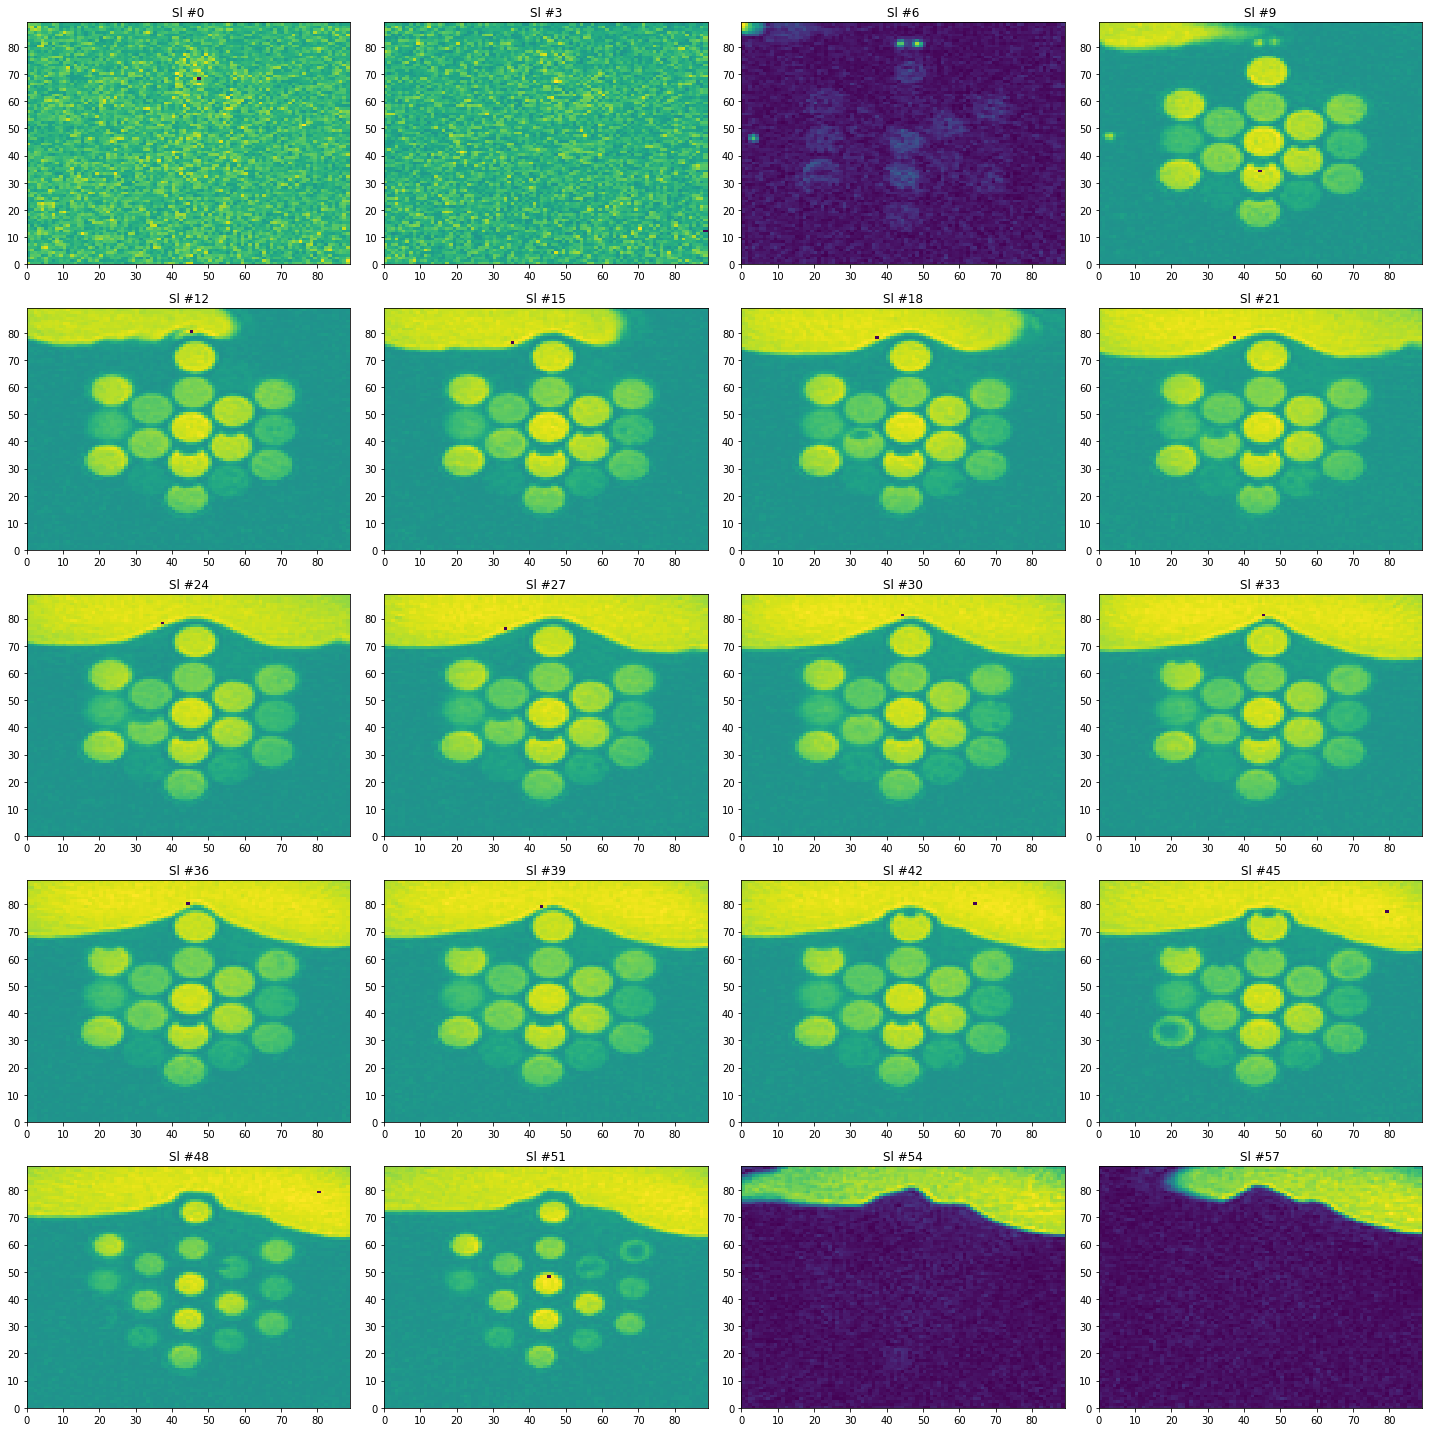

In [5]:
# plot a couple slices (sanity check)

# some utility functions:
def norm_mag_slice(cplx_data_3d, slice_num, axis):
    nz, ny, nx = cplx_data_3d.shape
    
    if axis == 0:
        ipnr, ipnc = (ny, nz)
        cplx_data_slice = cplx_data_3d[:, :, slice_num]
    elif axis == 1:
        ipnr, ipnc = (nx, nz)
        cplx_data_slice = cplx_data_3d[:, slice_num, :]
    elif axis == 2:
        ipnr, ipnc = (nx, ny)
        cplx_data_slice = cplx_data_3d[slice_num, :, :]
    
    row_axis = np.arange(ipnr)
    col_axis = np.arange(ipnc)
    mag_slice = np.ndarray((ipnr, ipnc), dtype=np.float)
    scl_slice = np.ndarray((ipnr, ipnc), dtype=np.int64)
    
    for row_i in range(ipnr):
        for col_i in range(ipnc):
            mag_slice[row_i, col_i] = np.float(np.abs(np.complex(
                *cplx_data_slice[col_i, row_i]
            )))
    scale = (2**63 -1)/np.max(mag_slice)
    for row_i in range(ipnr):
        for col_i in range(ipnc):
            scl_slice[row_i, col_i] = np.int64(
                scale * mag_slice[row_i, col_i]
            )
    
    return row_axis, col_axis, scl_slice

(nz, ny, nx) = recon_ims_all_echoes.shape[-3:]

plt.close()
plt.figure()

axial_planes = np.arange(0, nz, np.ceil(nz/20), dtype=np.uint8)
#print((nx,ny,nz),axial_planes)
fig, ax = plt.subplots(5, 4, figsize=(20.0, 20.0))
for pl, zi in enumerate(axial_planes):
    rows, cols, imslice = norm_mag_slice(recon_ims_all_echoes[0,0,::],
                                         zi, 2)
    aa = ax[int(pl/4)][int(pl%4)]
    aa.pcolormesh(rows, cols, imslice)
    aa.set_title('Sl #{:d}'.format(zi))

fig.tight_layout()
fig.patch.set_facecolor('#ffffff')
plt.show()

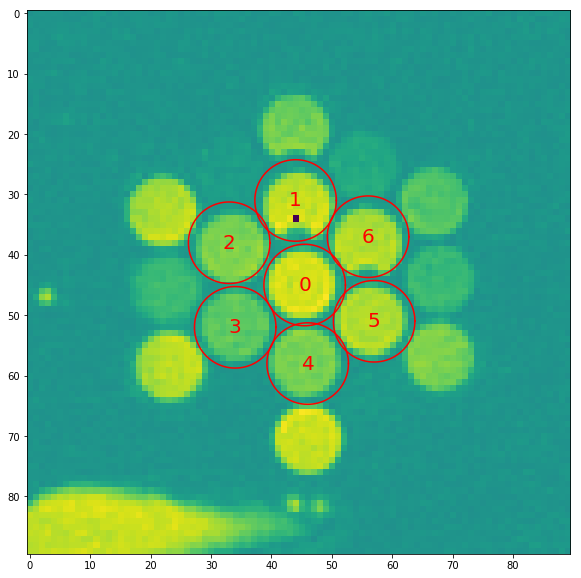

In [6]:
plt.close()
fig = plt.figure(figsize=(10.0, 10.0))

sli = 9
rr,cc,scl_slice = norm_mag_slice(recon_ims_all_echoes[0,0,::], sli, 2)
plt.imshow(scl_slice)

rc = 13.5 # mm
cx0 = int(nx/2) #+0.5
cy0 = int(ny/2) +0.5

#plt.plot(cx0, cy0, 'rx')
plt.text(cy0, cx0, '{:d}'.format(0), fontdict = {
    'color': 'red',
    'fontsize': 20,
    'horizontalalignment' : 'center',
    'verticalalignment' : 'center'
})
th = np.linspace(0.0, 2*np.pi, 100)
xx = rc/dx * np.cos(th) + cy0
yy = rc/dy * np.sin(th) + cx0
plt.plot(xx, yy, 'r')

dth = np.pi + np.pi/50.0
for ci in range(6):
    thi = dth + ci * np.pi / 3.0
    cx = int(((cx0 * dx) + (2 * rc * np.cos(thi)))/dx)
    cy = int(((cy0 * dy) + (2 * rc * np.sin(thi)))/dy)
    #plt.plot(cx, cy, 'rx')
    th = np.linspace(0.0, 2*np.pi, 100)
    xx = rc/dy * np.cos(th) + cy
    yy = rc/dx * np.sin(th) + cx
    plt.plot(xx, yy, 'r')
    plt.text(cy, cx, '{:d}'.format(ci+1), fontdict = {
        'color': 'red',
        'fontsize': 20,
        'horizontalalignment' : 'center',
        'verticalalignment' : 'center'
    })

plt.show()

fig.savefig('sl-{:d}.png'.format(sli))

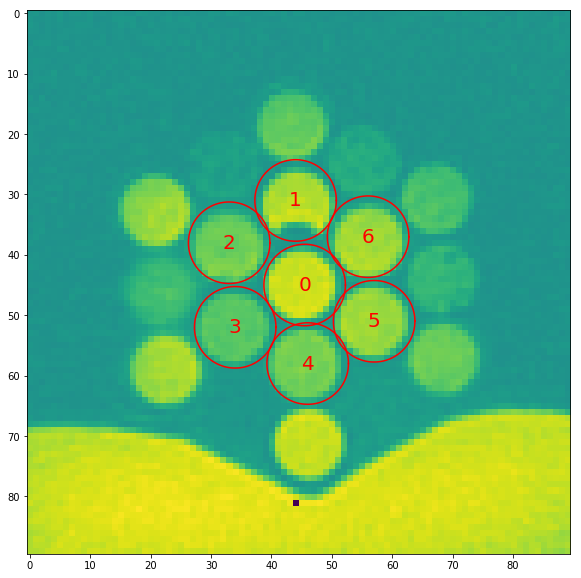

In [7]:
plt.close()
fig = plt.figure(figsize=(10.0, 10.0))

sli = 30
rr,cc,scl_slice = norm_mag_slice(recon_ims_all_echoes[0,0,::], sli, 2)
plt.imshow(scl_slice)

rc = 13.5 # mm
cx0 = int(nx/2) #+0.5
cy0 = int(ny/2) +0.5

#plt.plot(cx0, cy0, 'rx')
plt.text(cy0, cx0, '{:d}'.format(0), fontdict = {
    'color': 'red',
    'fontsize': 20,
    'horizontalalignment' : 'center',
    'verticalalignment' : 'center'
})
th = np.linspace(0.0, 2*np.pi, 100)
xx = rc/dx * np.cos(th) + cy0
yy = rc/dy * np.sin(th) + cx0
plt.plot(xx, yy, 'r')

dth = np.pi + np.pi/50.0
for ci in range(6):
    thi = dth + ci * np.pi / 3.0
    cx = int(((cx0 * dx) + (2 * rc * np.cos(thi)))/dx)
    cy = int(((cy0 * dy) + (2 * rc * np.sin(thi)))/dy)
    #plt.plot(cx, cy, 'rx')
    th = np.linspace(0.0, 2*np.pi, 100)
    xx = rc/dy * np.cos(th) + cy
    yy = rc/dx * np.sin(th) + cx
    plt.plot(xx, yy, 'r')
    plt.text(cy, cx, '{:d}'.format(ci+1), fontdict = {
        'color': 'red',
        'fontsize': 20,
        'horizontalalignment' : 'center',
        'verticalalignment' : 'center'
    })

plt.show()

fig.savefig('sl-{:d}.png'.format(sli))

In [8]:
# Generate ROIs

# Container dimensions
nc = 12
rc = 13.5 # Container radius (mm)
hc = 95.25 # Container height (mm) NOTE: outer dimensions

# ROI dimensions (use the approx. center)
rr = rc * 0.25
hr = hc * 0.5

# image center
im_cx = nx * dx / 2.0
im_cy = ny * dy / 2.0
im_cz = nz * dz / 2.0

# some fudge factors
del_th = np.pi + np.pi / 50.0 # angle offset
cz0 = 30.0 * dz # center of 10-dram vials (approx. axial slice)
cy0 = im_cy + (-0.5 * dy)
cx0 = im_cx + (0.5 * dx)

# ROI labels
roi_labels = [
    '0: (W01.1) Water',
    '1: (W01.2) Water',
    '2: (A06.1) Coconut Oil',
    '3: (A06.2) Coconut Oil',
    '4: (A04.1) Propargyl Alcohol',
    '5: (A04.2) Propargyl Alcohol',
    '6: (A02.1) Acetone',
    '7: (A02.2) Acetone',
    '8: (A05.1) Gelatin',
    '9: (A05.2) Gelatin',
    '10: (A03.1) Isopropyl Alcohol',
    '11: (A03.2) Isopropyl Alcohol',
]

sys.path.append('/home/dharshan/Code/Work/UCSF-qMRI/')
from phantom_quant import roi

roi_info = []
for ci in range(nc):
    if (ci % 2 == 0):
        thi = del_th + np.floor(ci/2) * np.pi / 3.0
        del_cx = 2 * rc * np.cos(thi)
        del_cy = 2 * rc * np.sin(thi)
    else:
        thi = np.pi + del_th + np.floor(ci/2) * np.pi / 3.0
        del_cx = 4 * rc * np.cos(thi)
        del_cy = 4 * rc * np.sin(thi)
    
    roi_info.append({})
    roi_info[ci]['cx'] = cx0 + del_cx
    roi_info[ci]['cy'] = cy0 + del_cy
    roi_info[ci]['cz'] = cz0
    
    roi_info[ci]['ht'] = hr
    roi_info[ci]['rd'] = rr
    
    roi_info[ci]['mask'] = roi.CylinderROI(
        roi_info[ci]['cx'],
        roi_info[ci]['cy'],
        roi_info[ci]['cz'],
        roi_info[ci]['ht'],
        roi_info[ci]['rd']
    ).generate_mask(nx, ny, nz, dx, dy, dz)
    
    roi_info[ci]['label'] = roi_labels[ci]


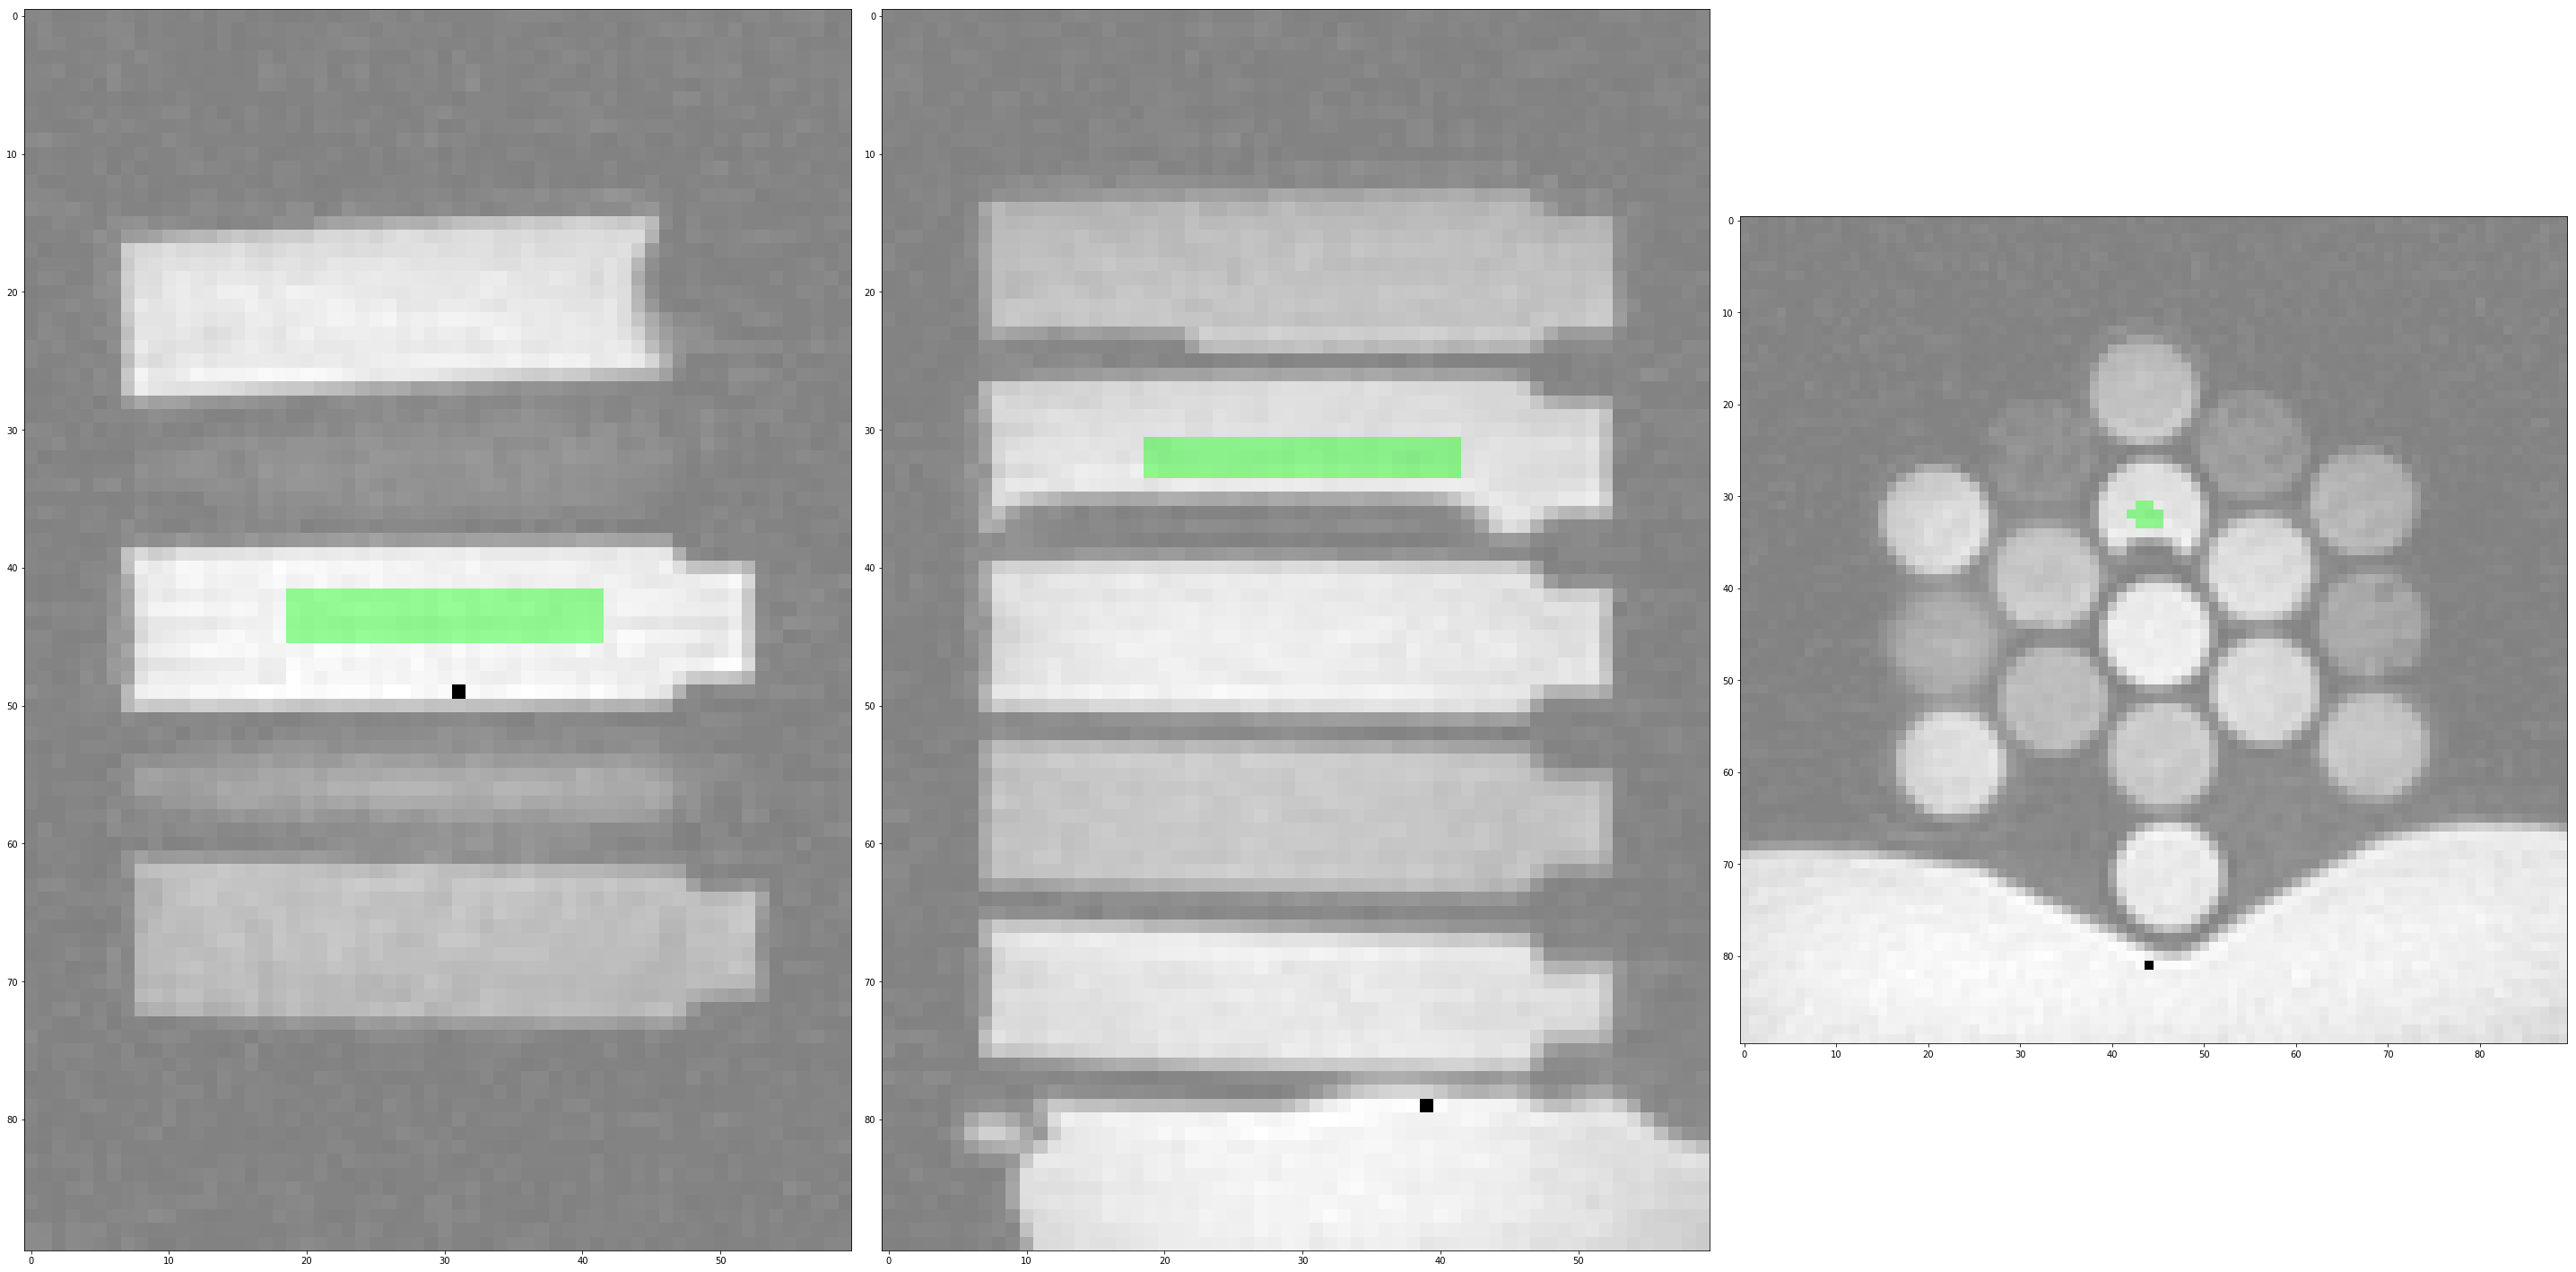

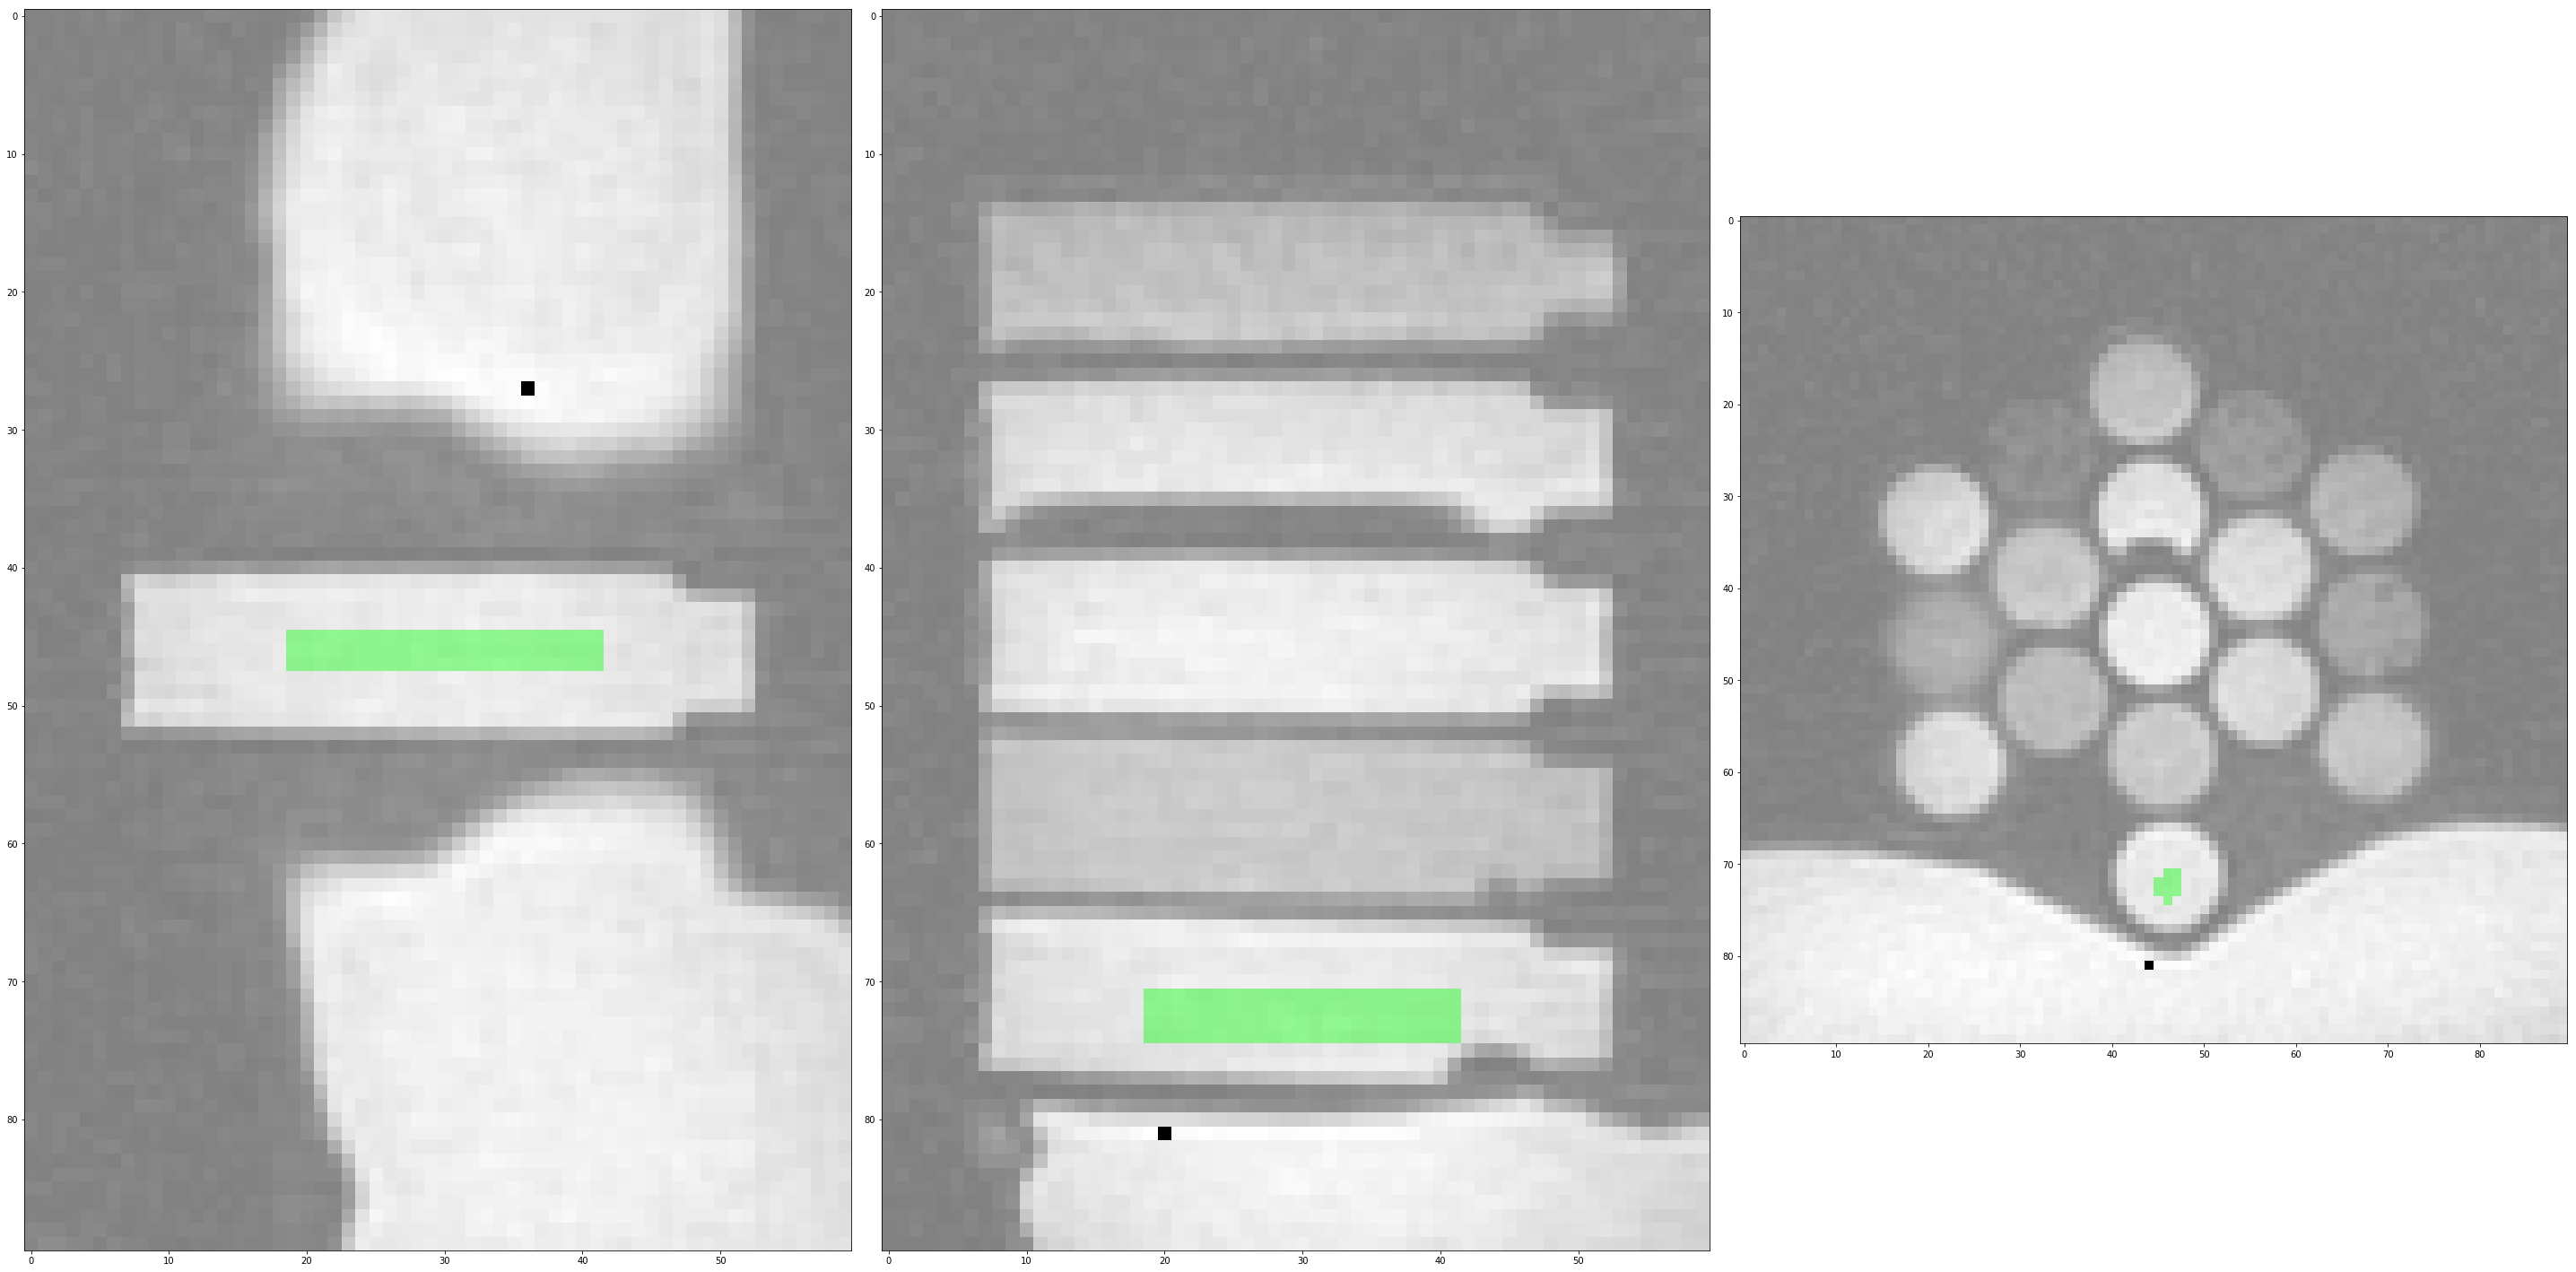

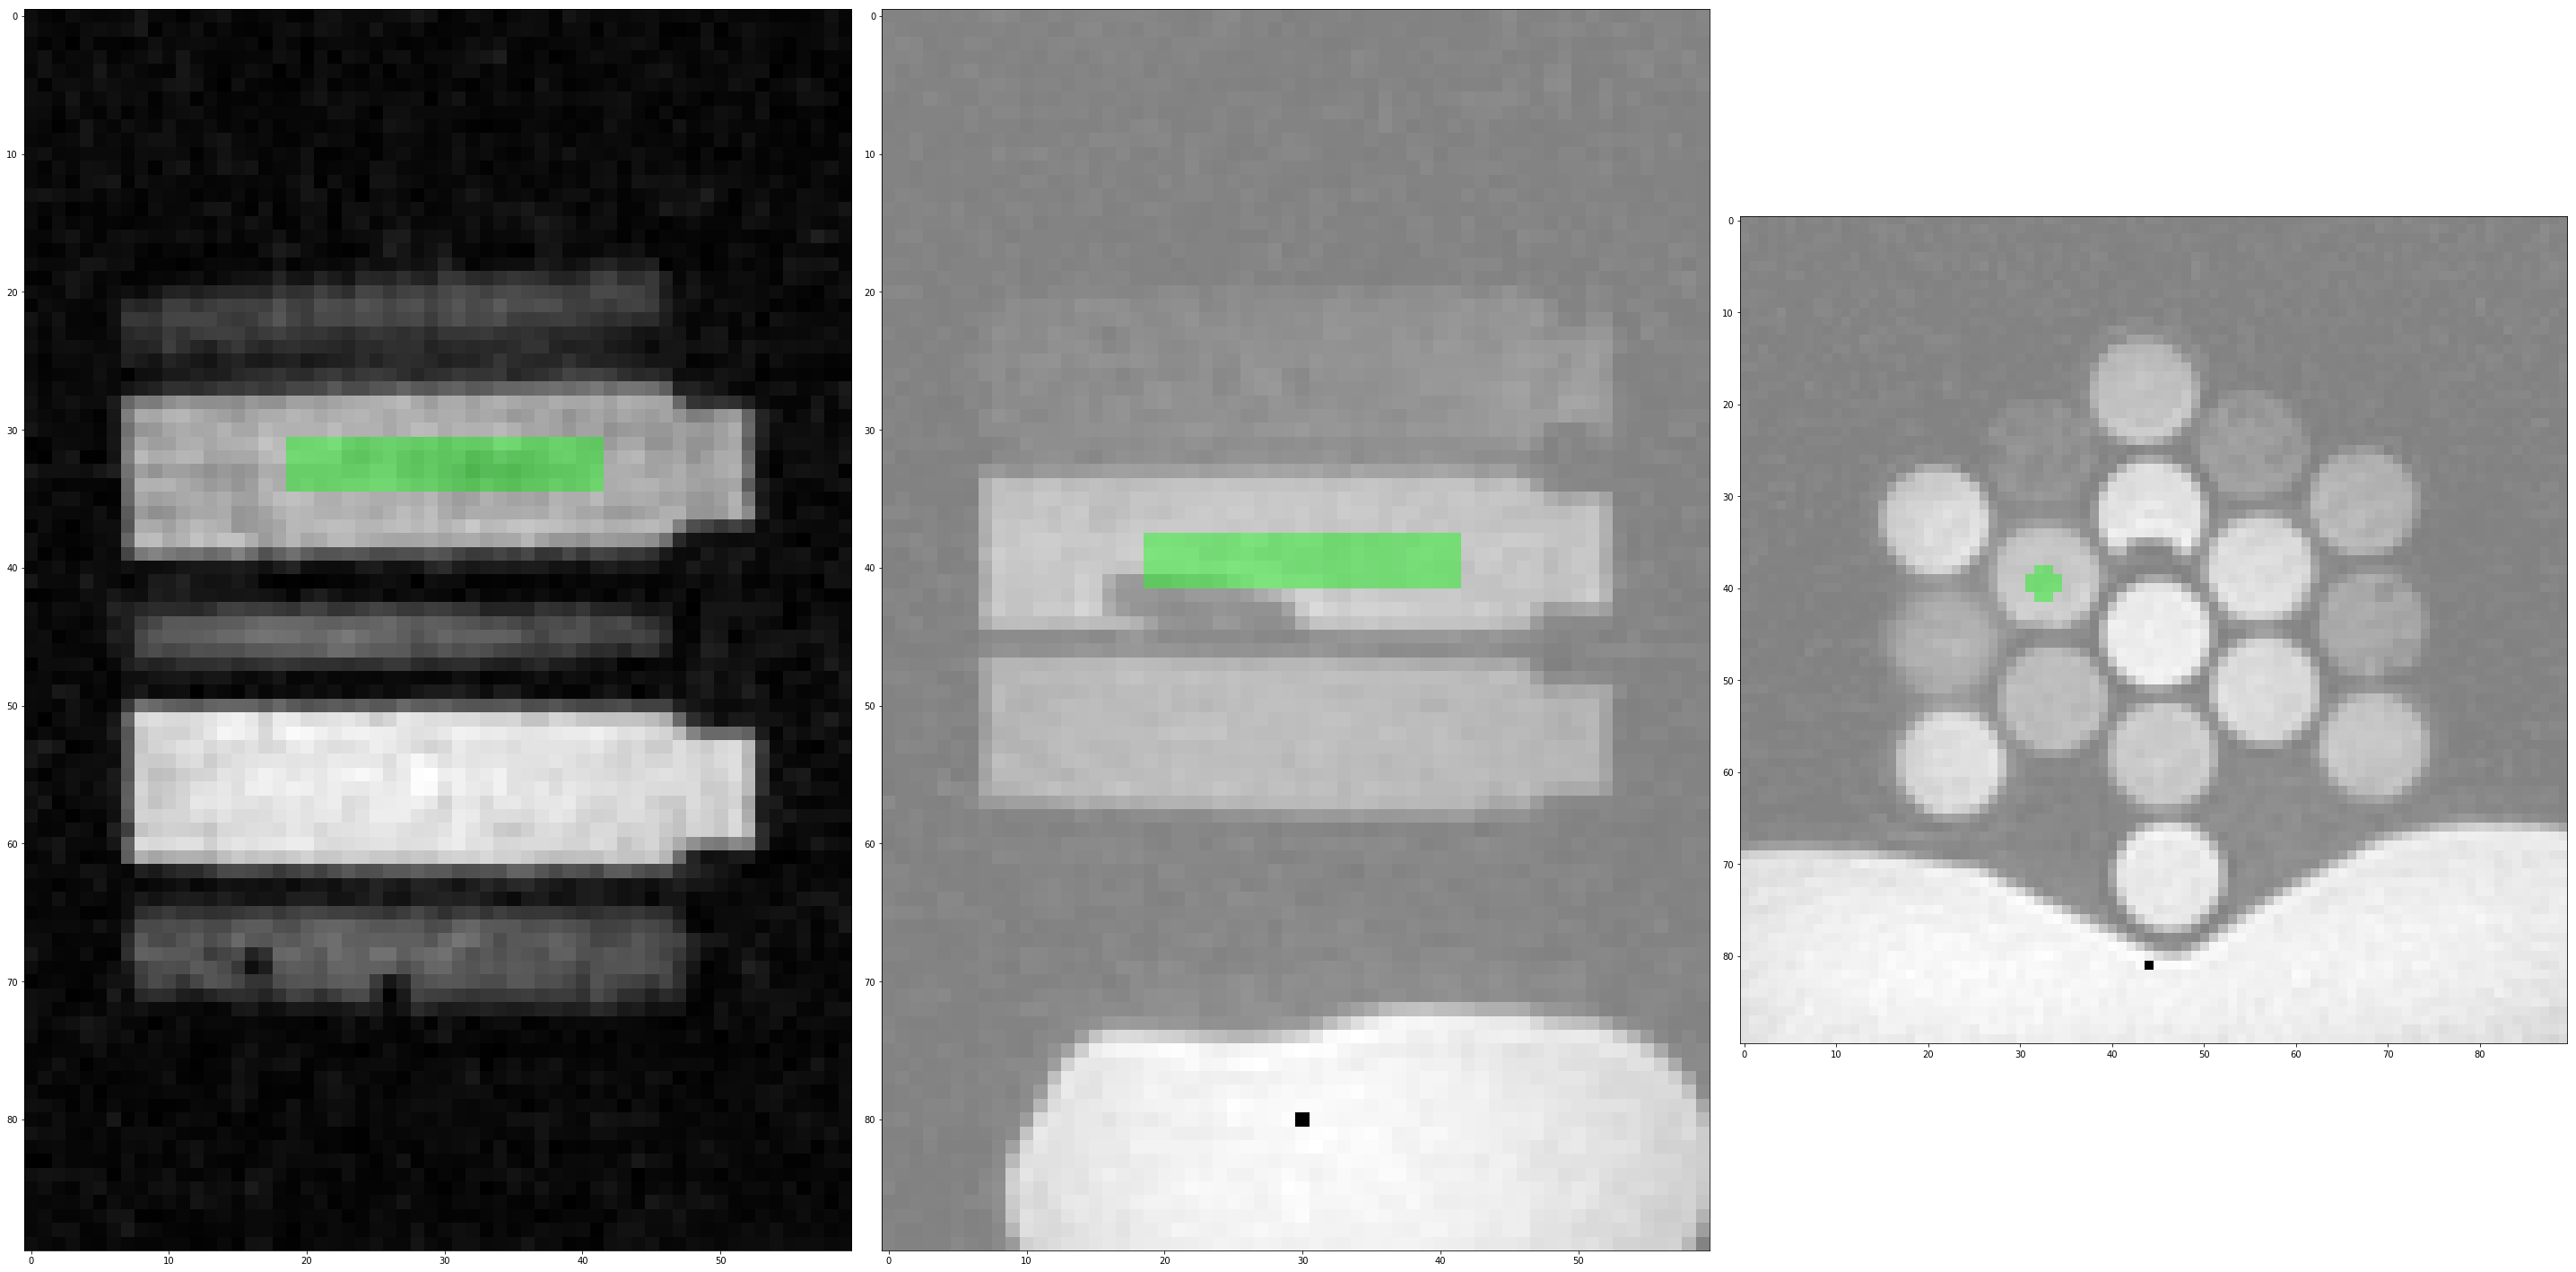

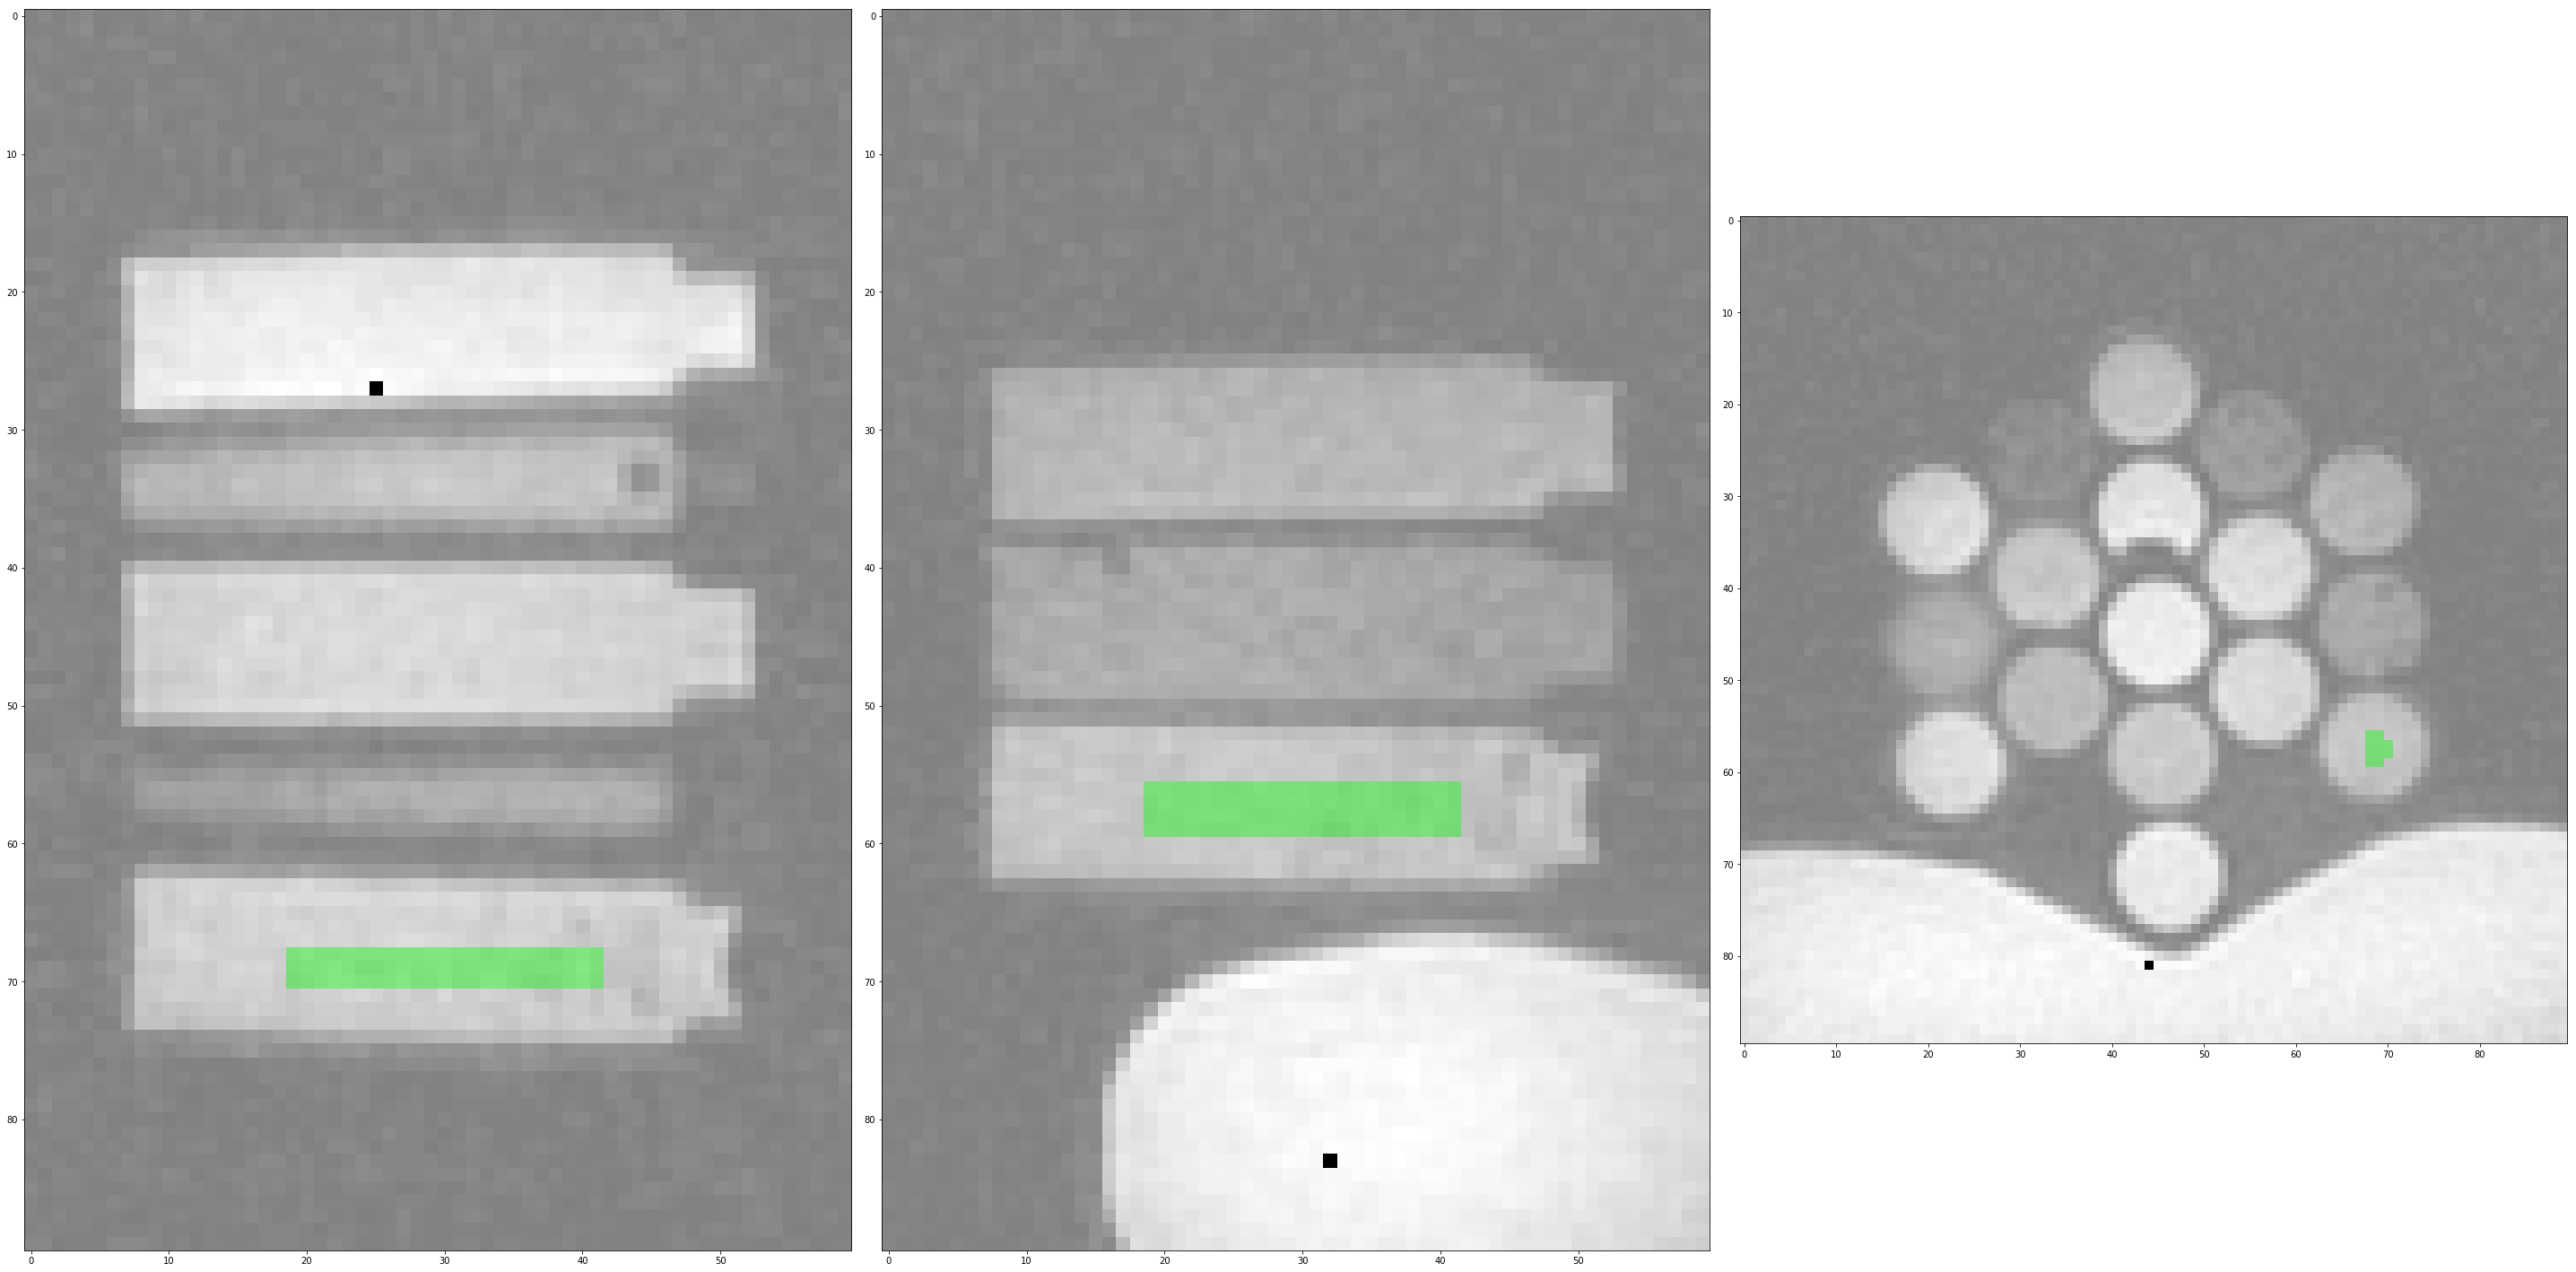

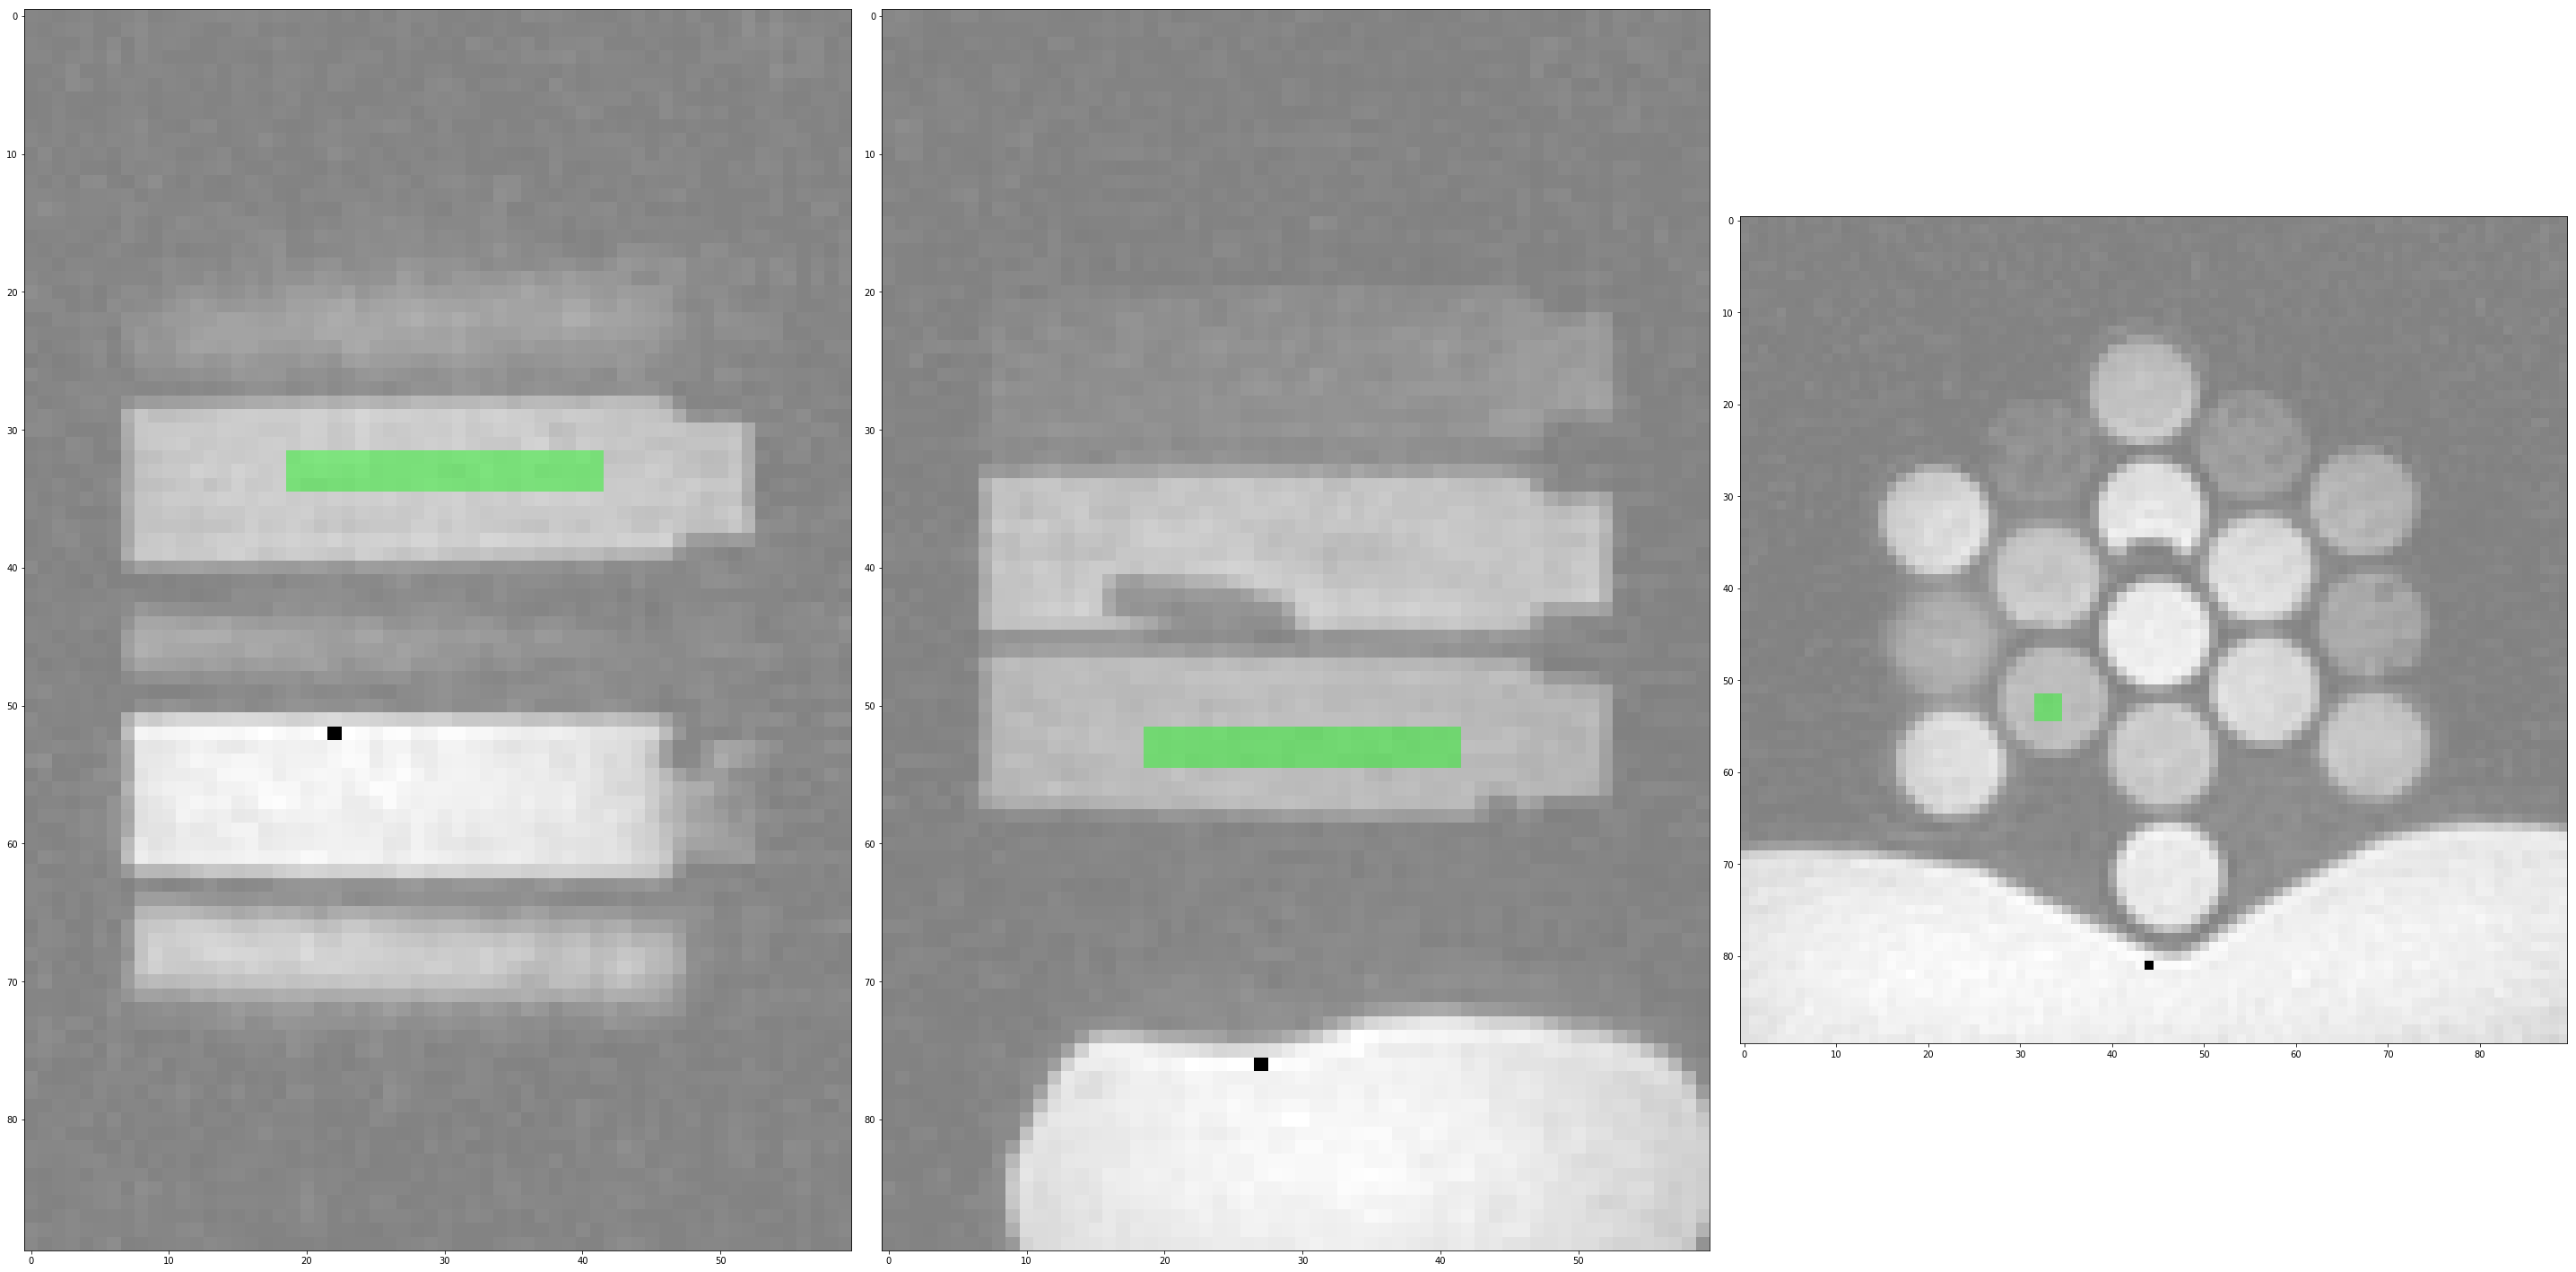

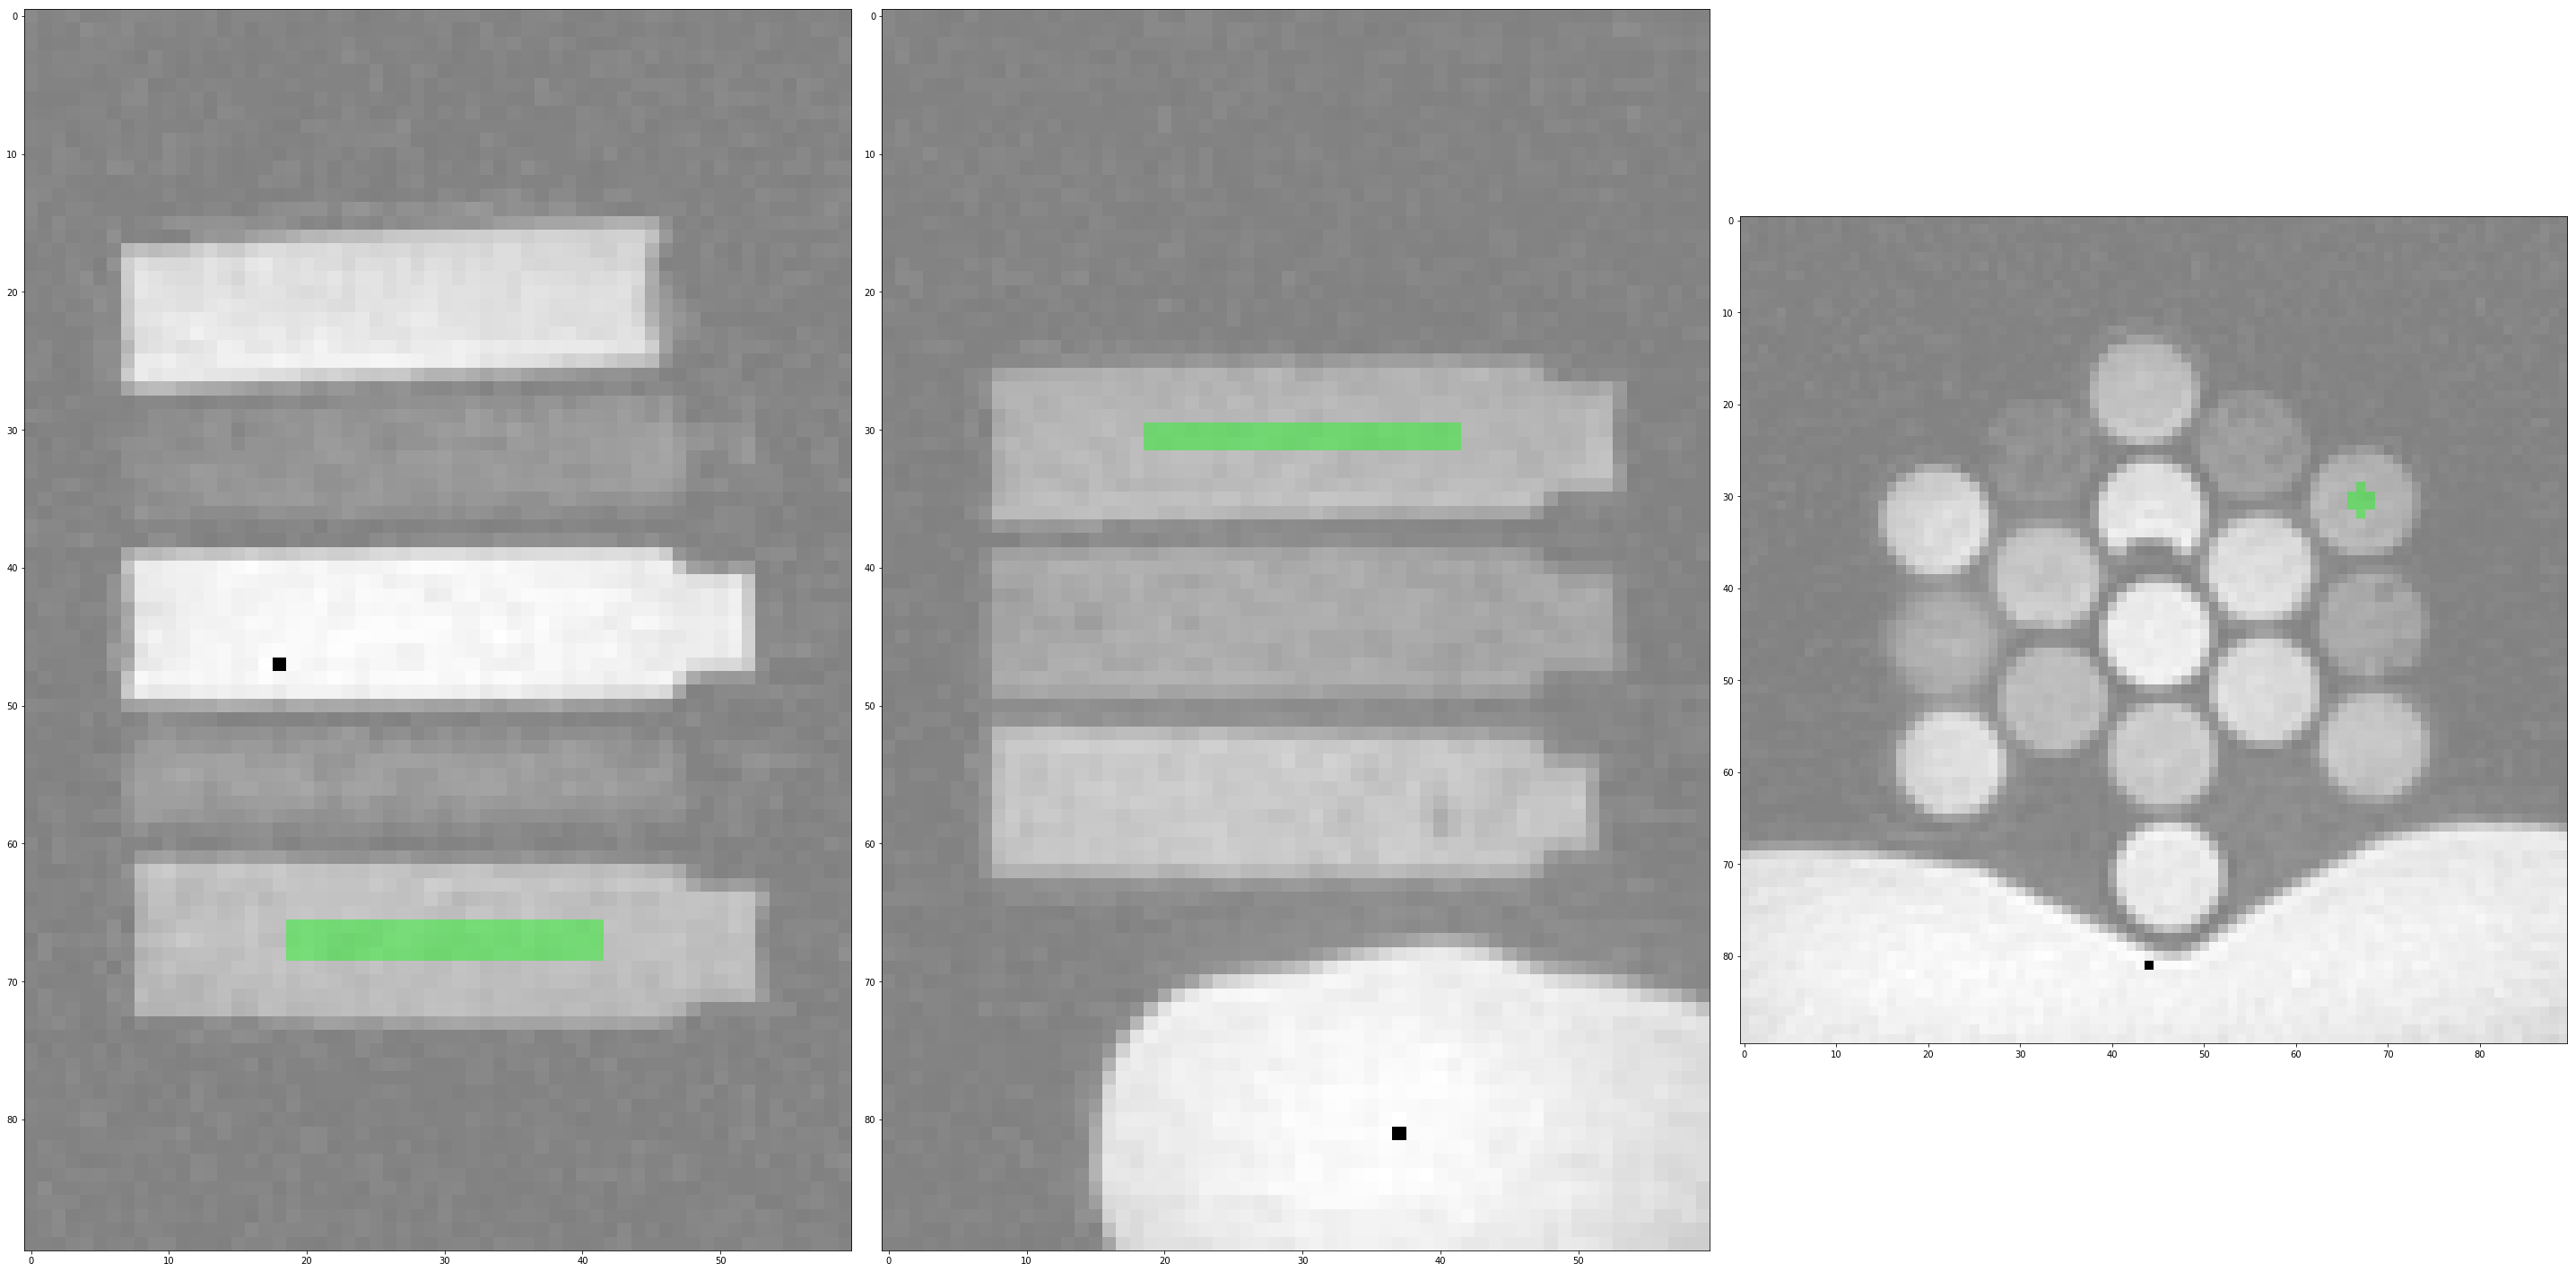

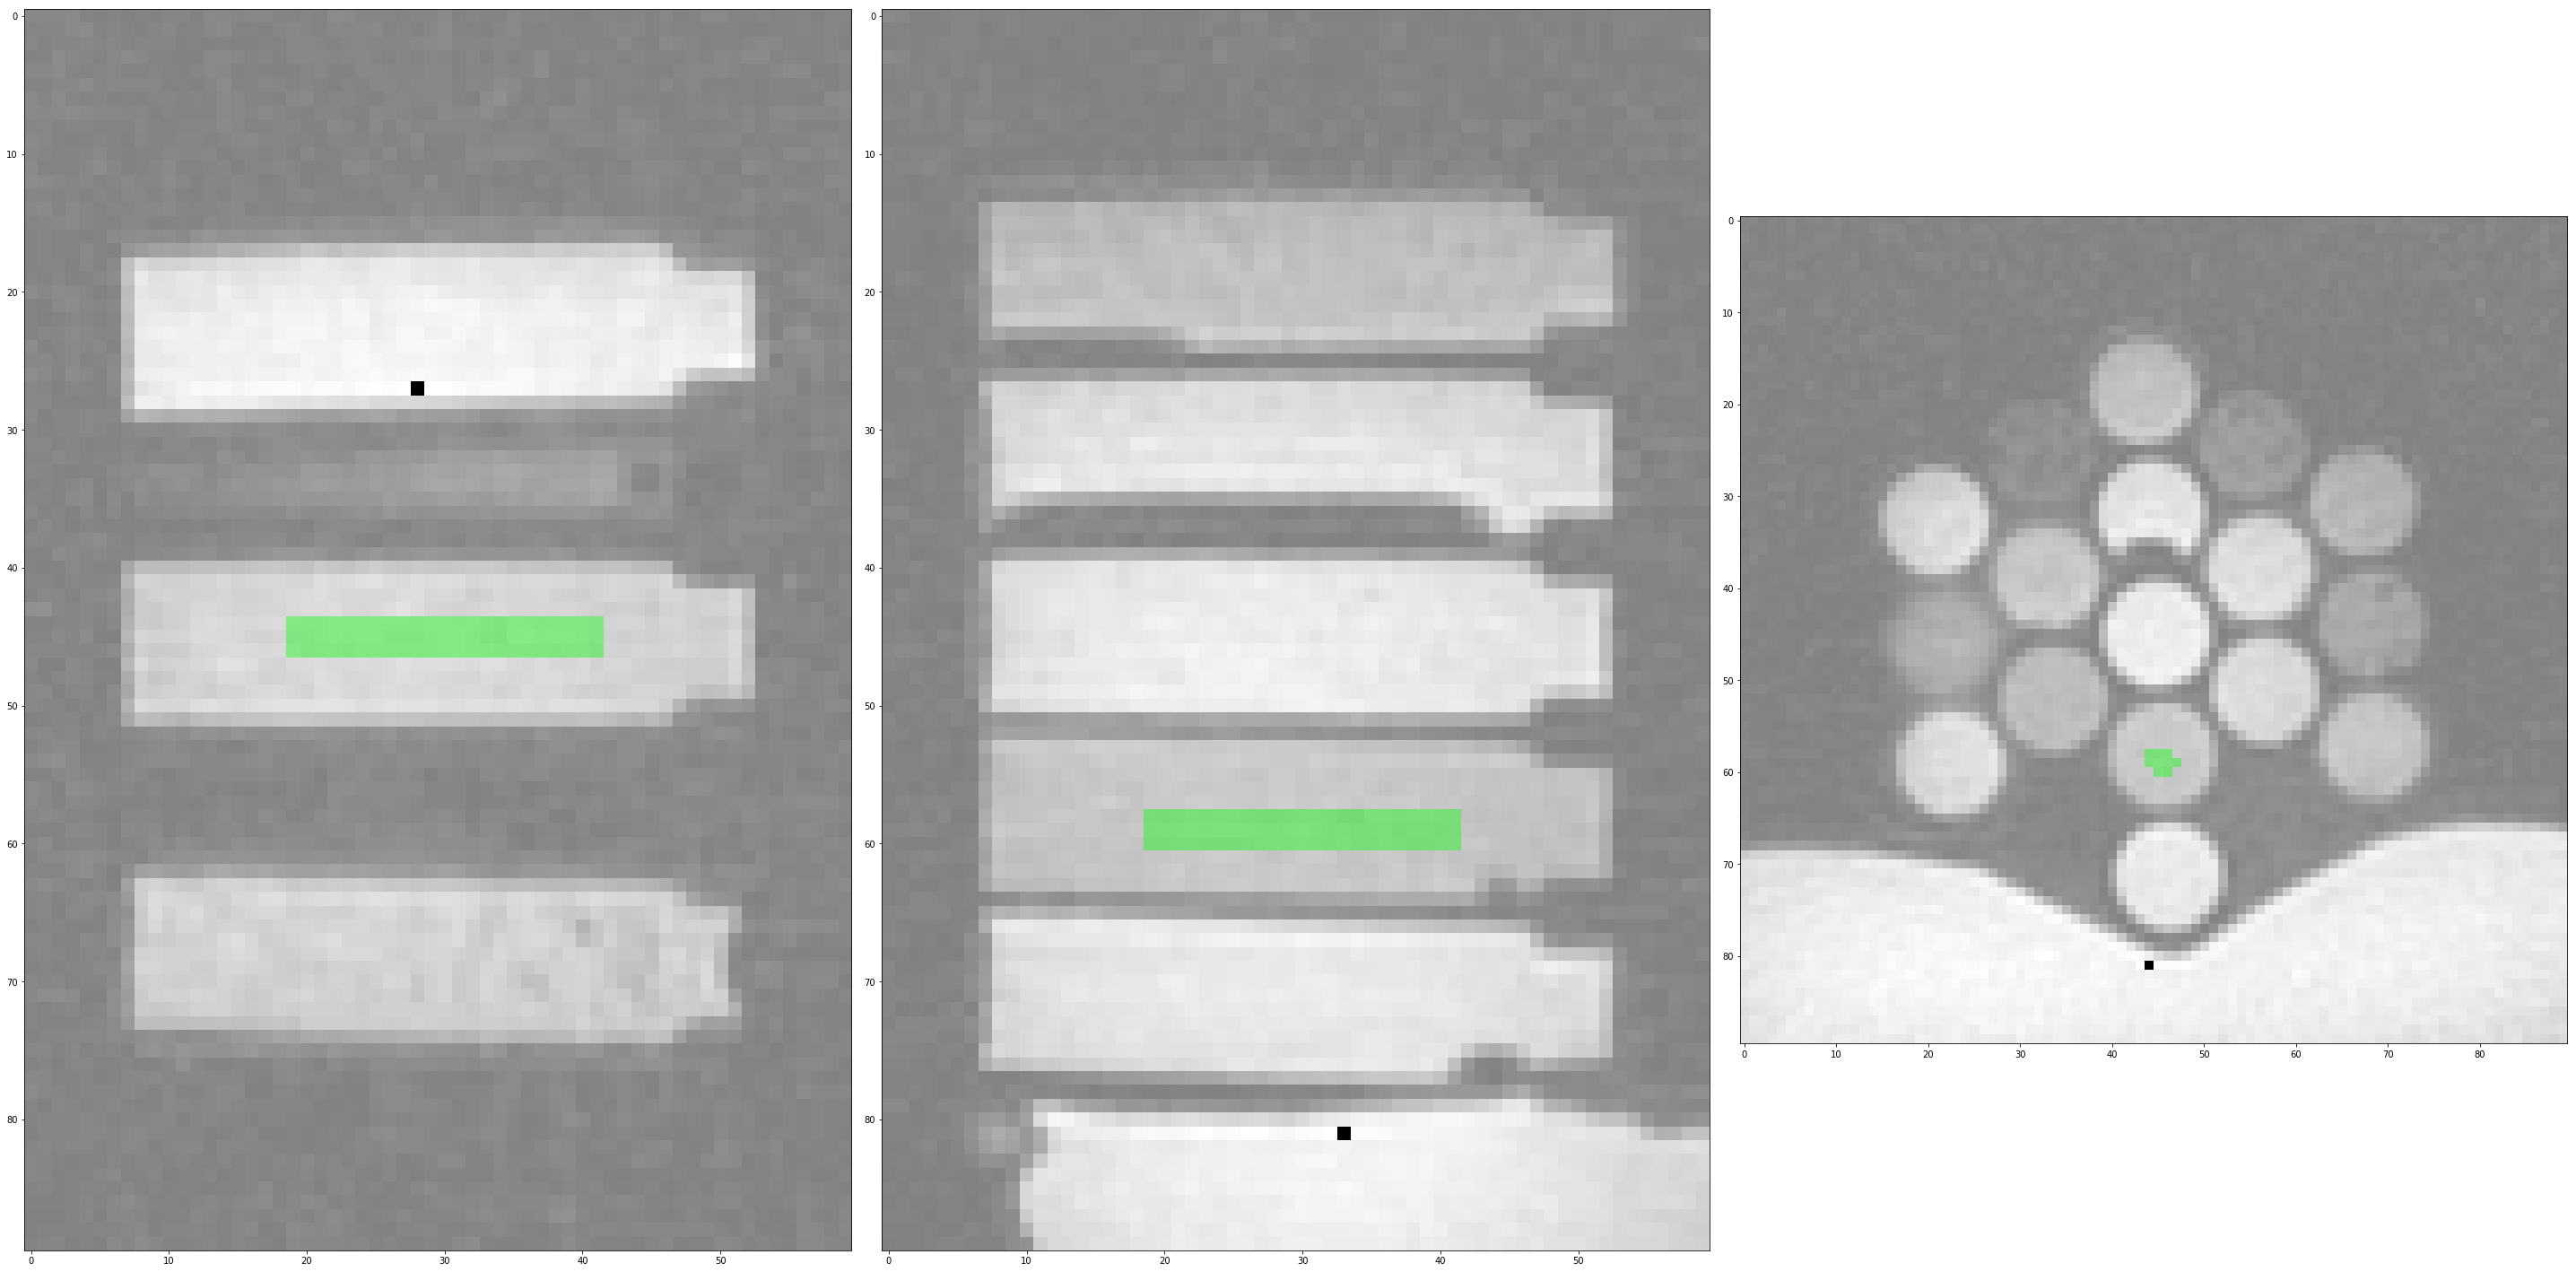

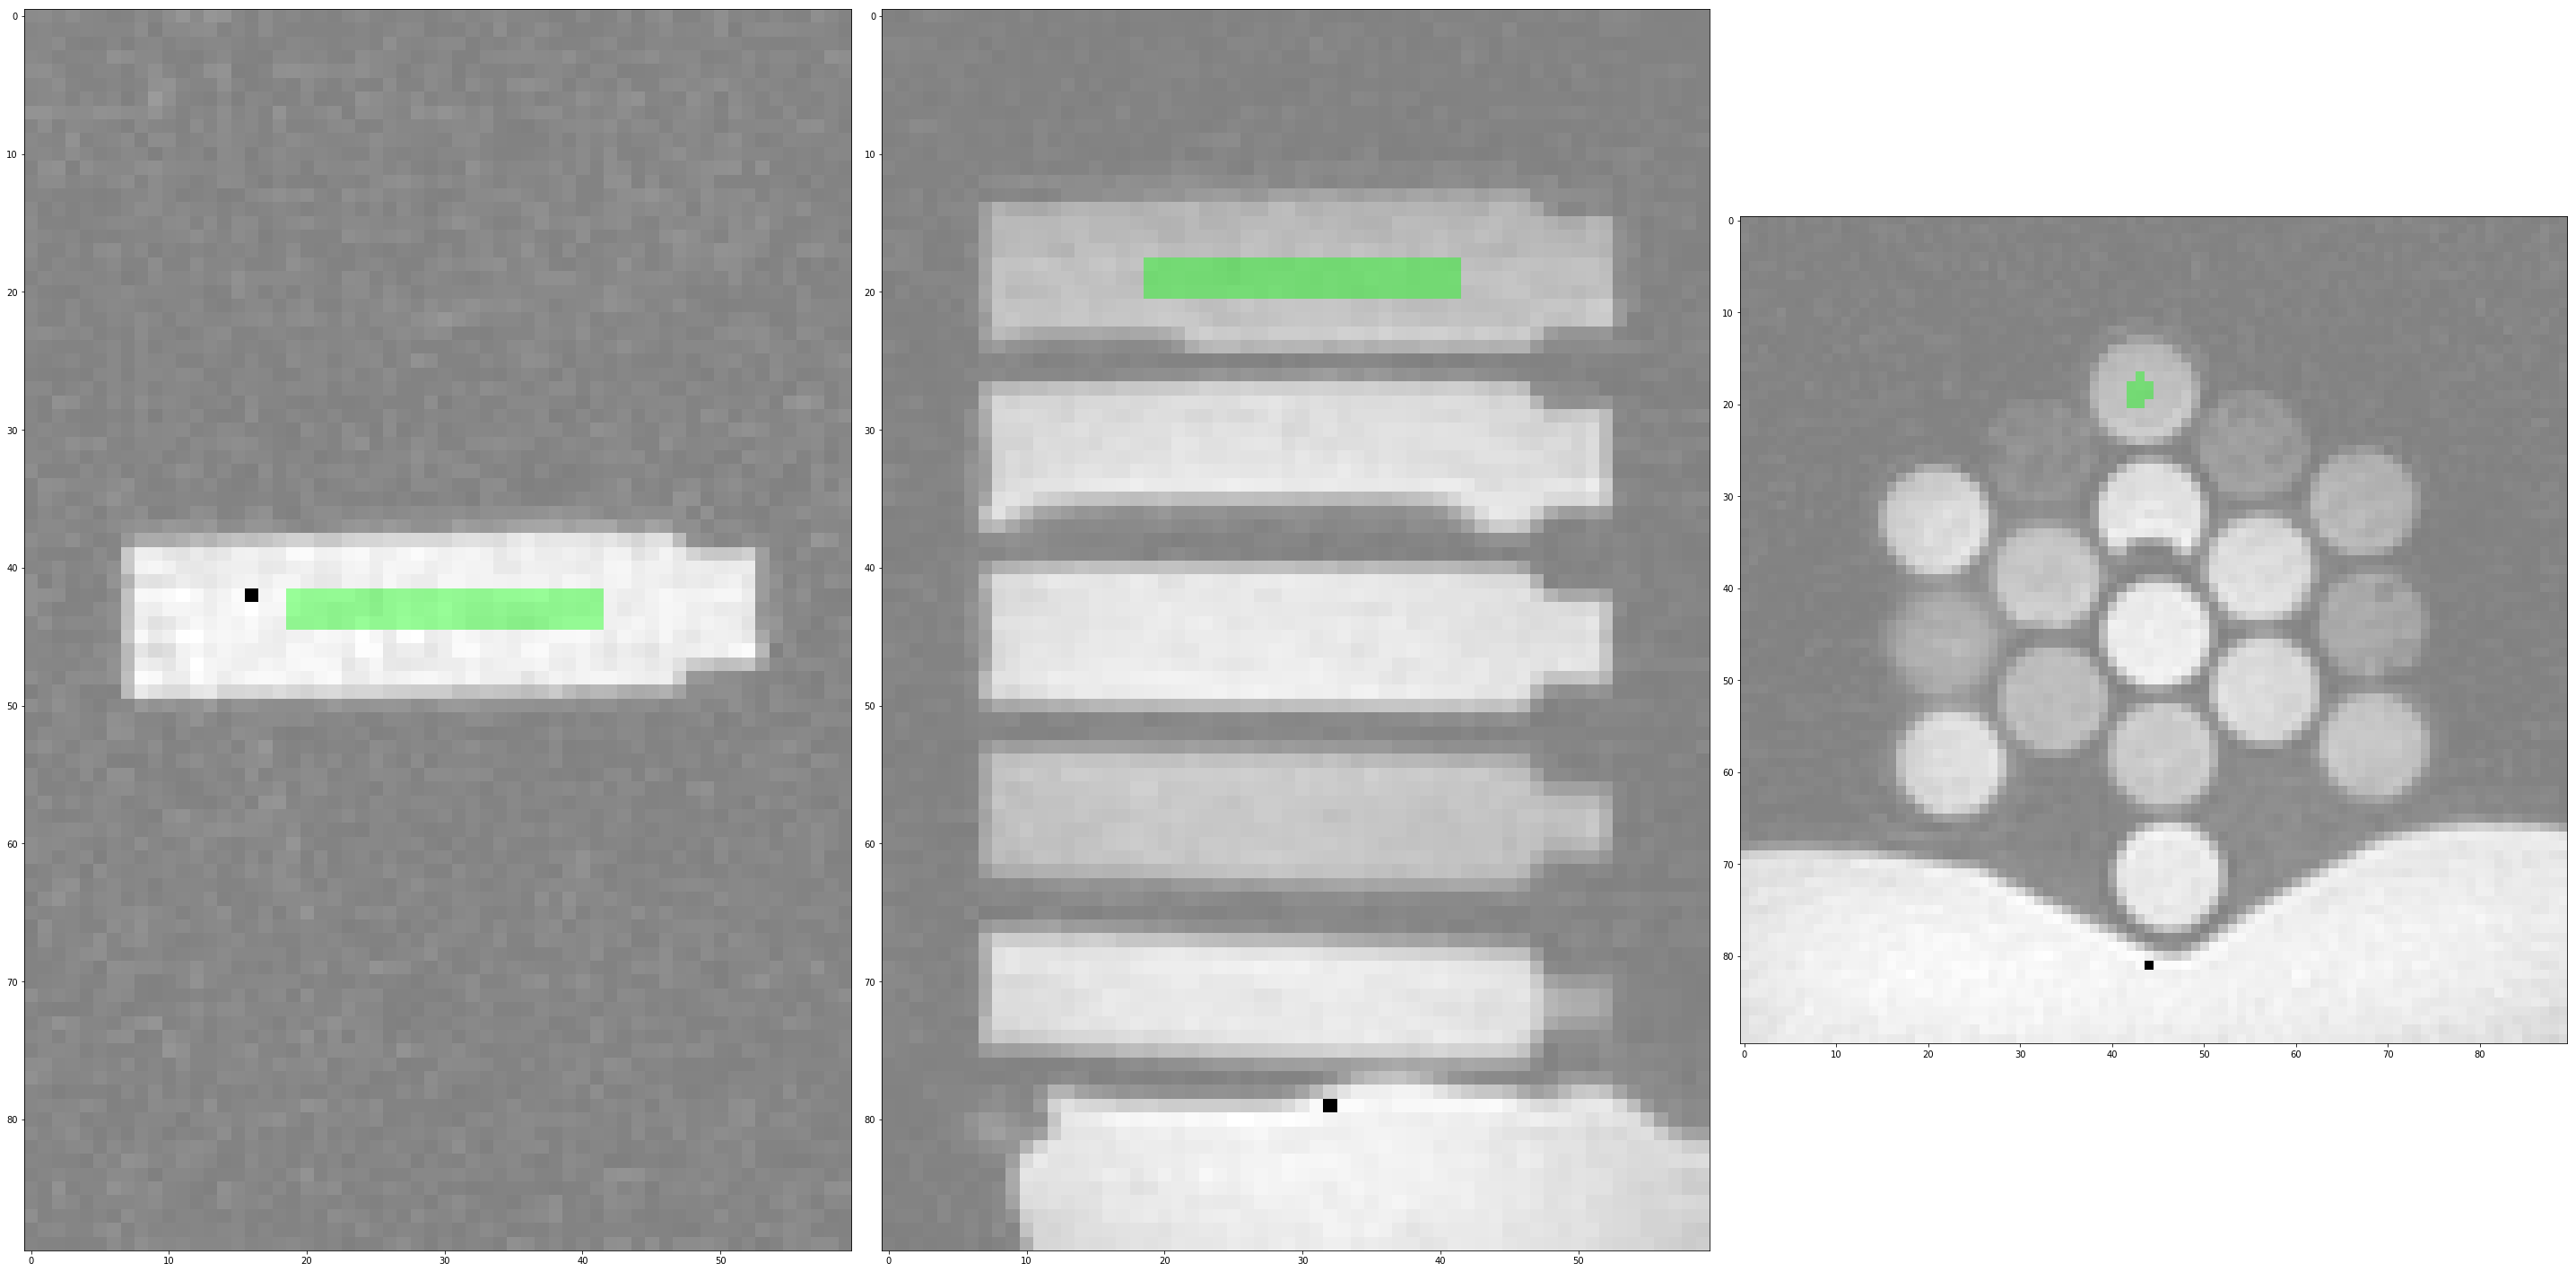

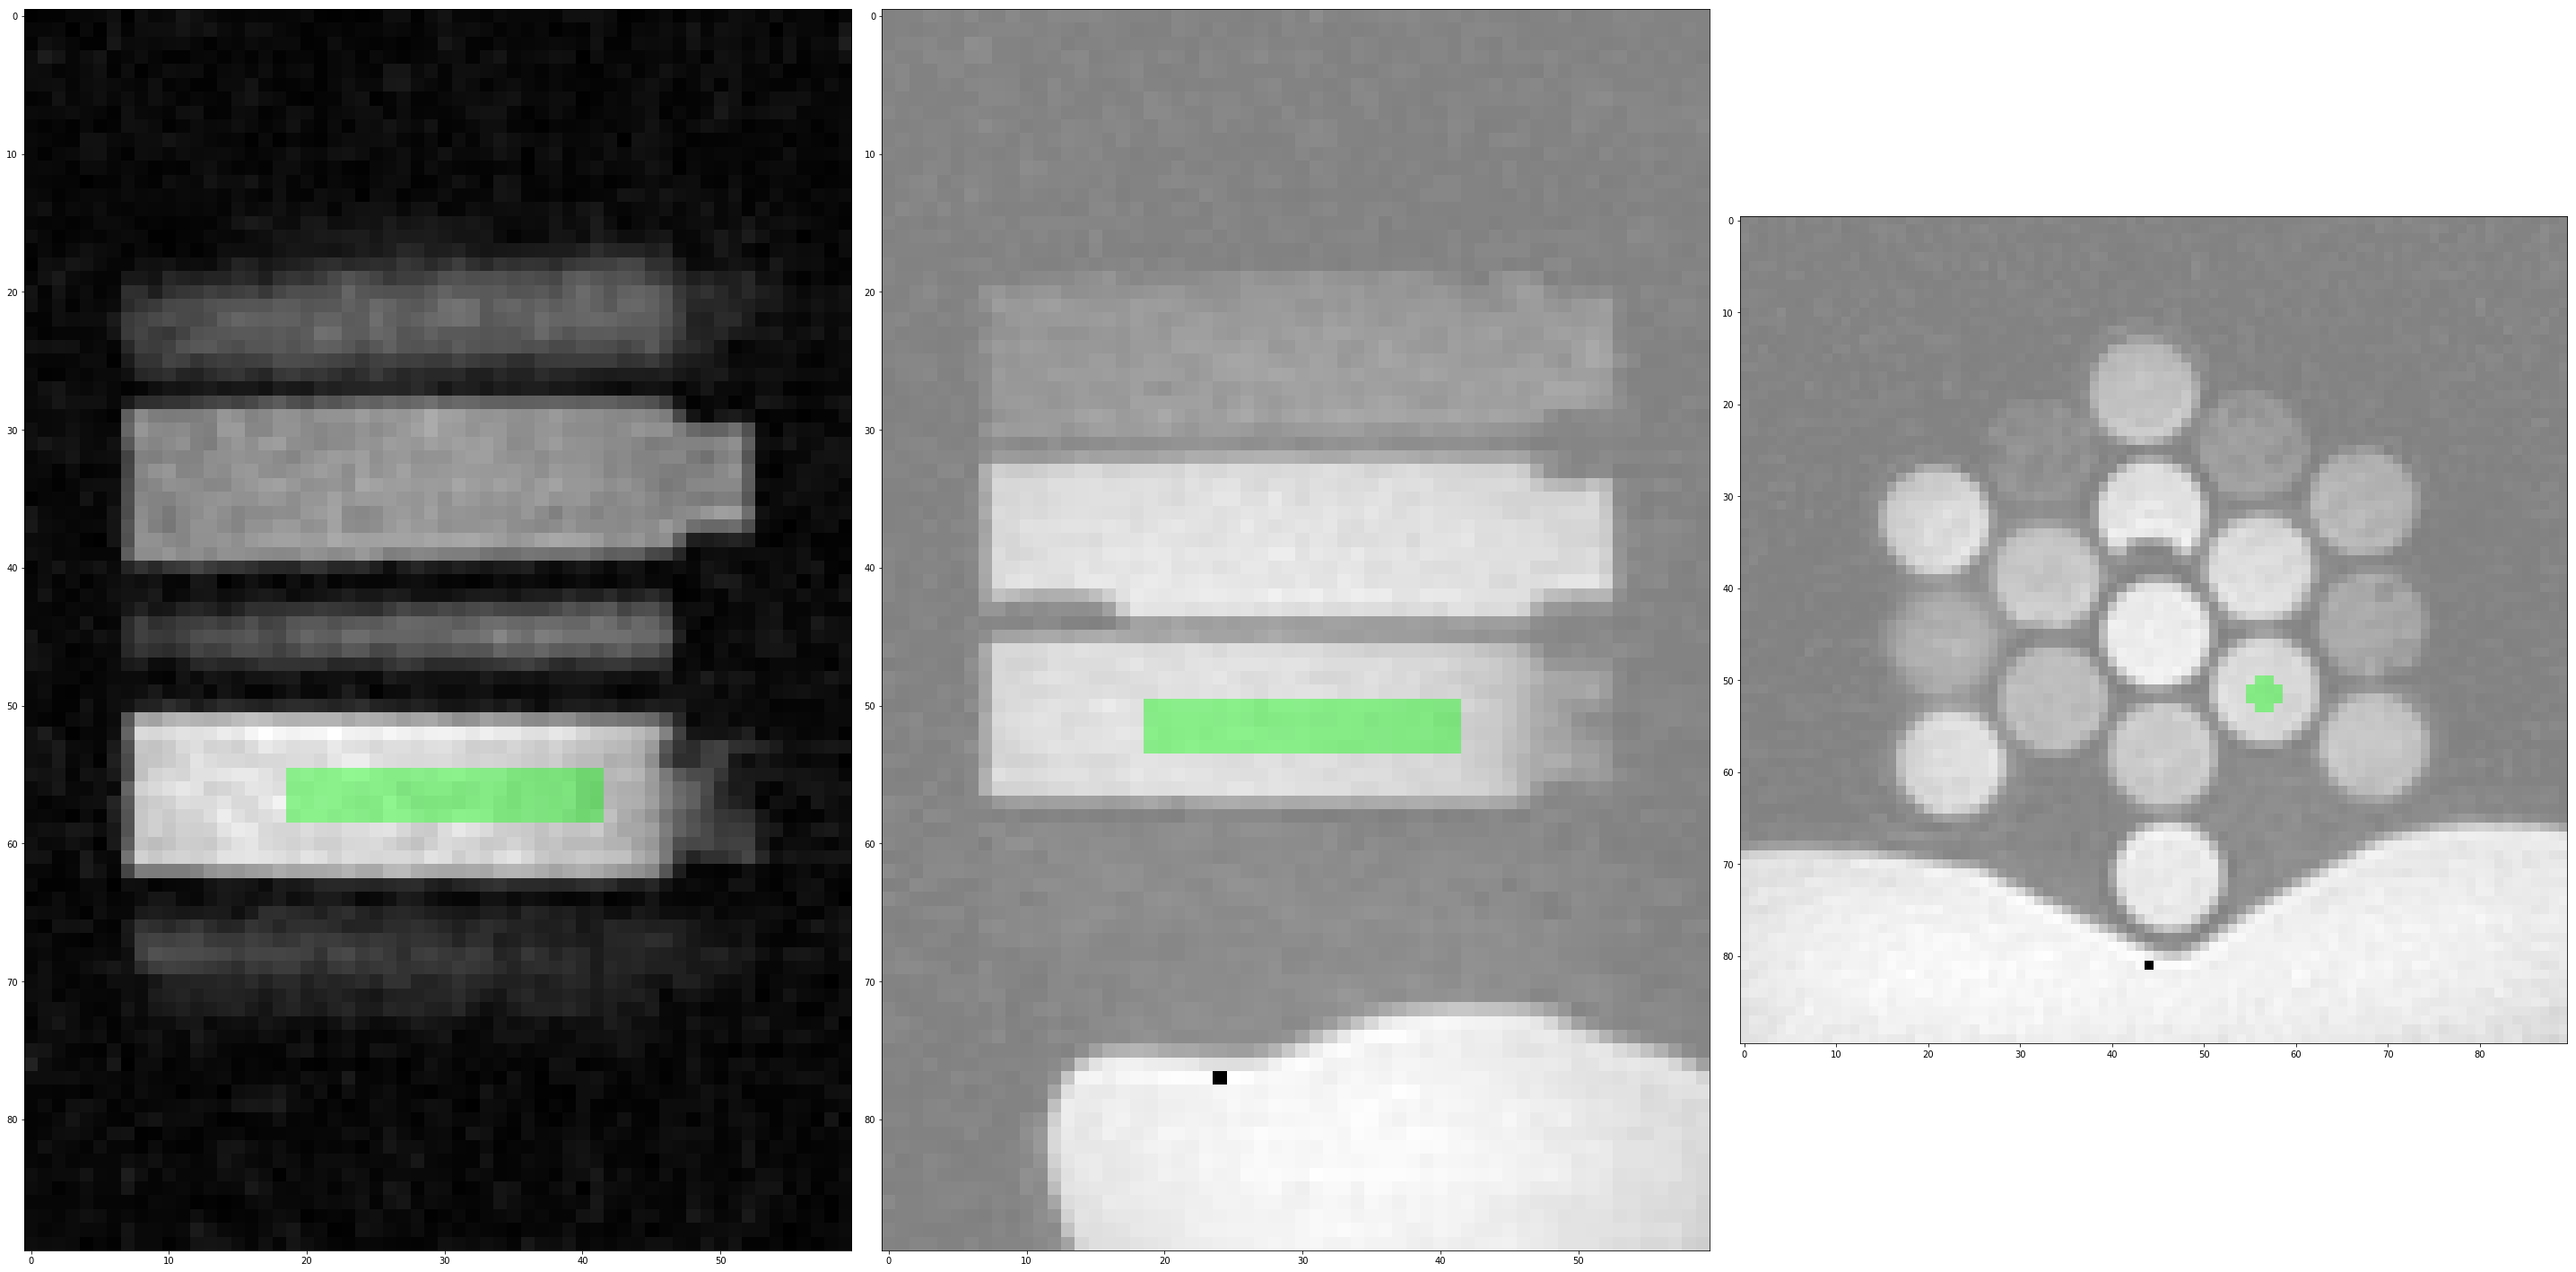

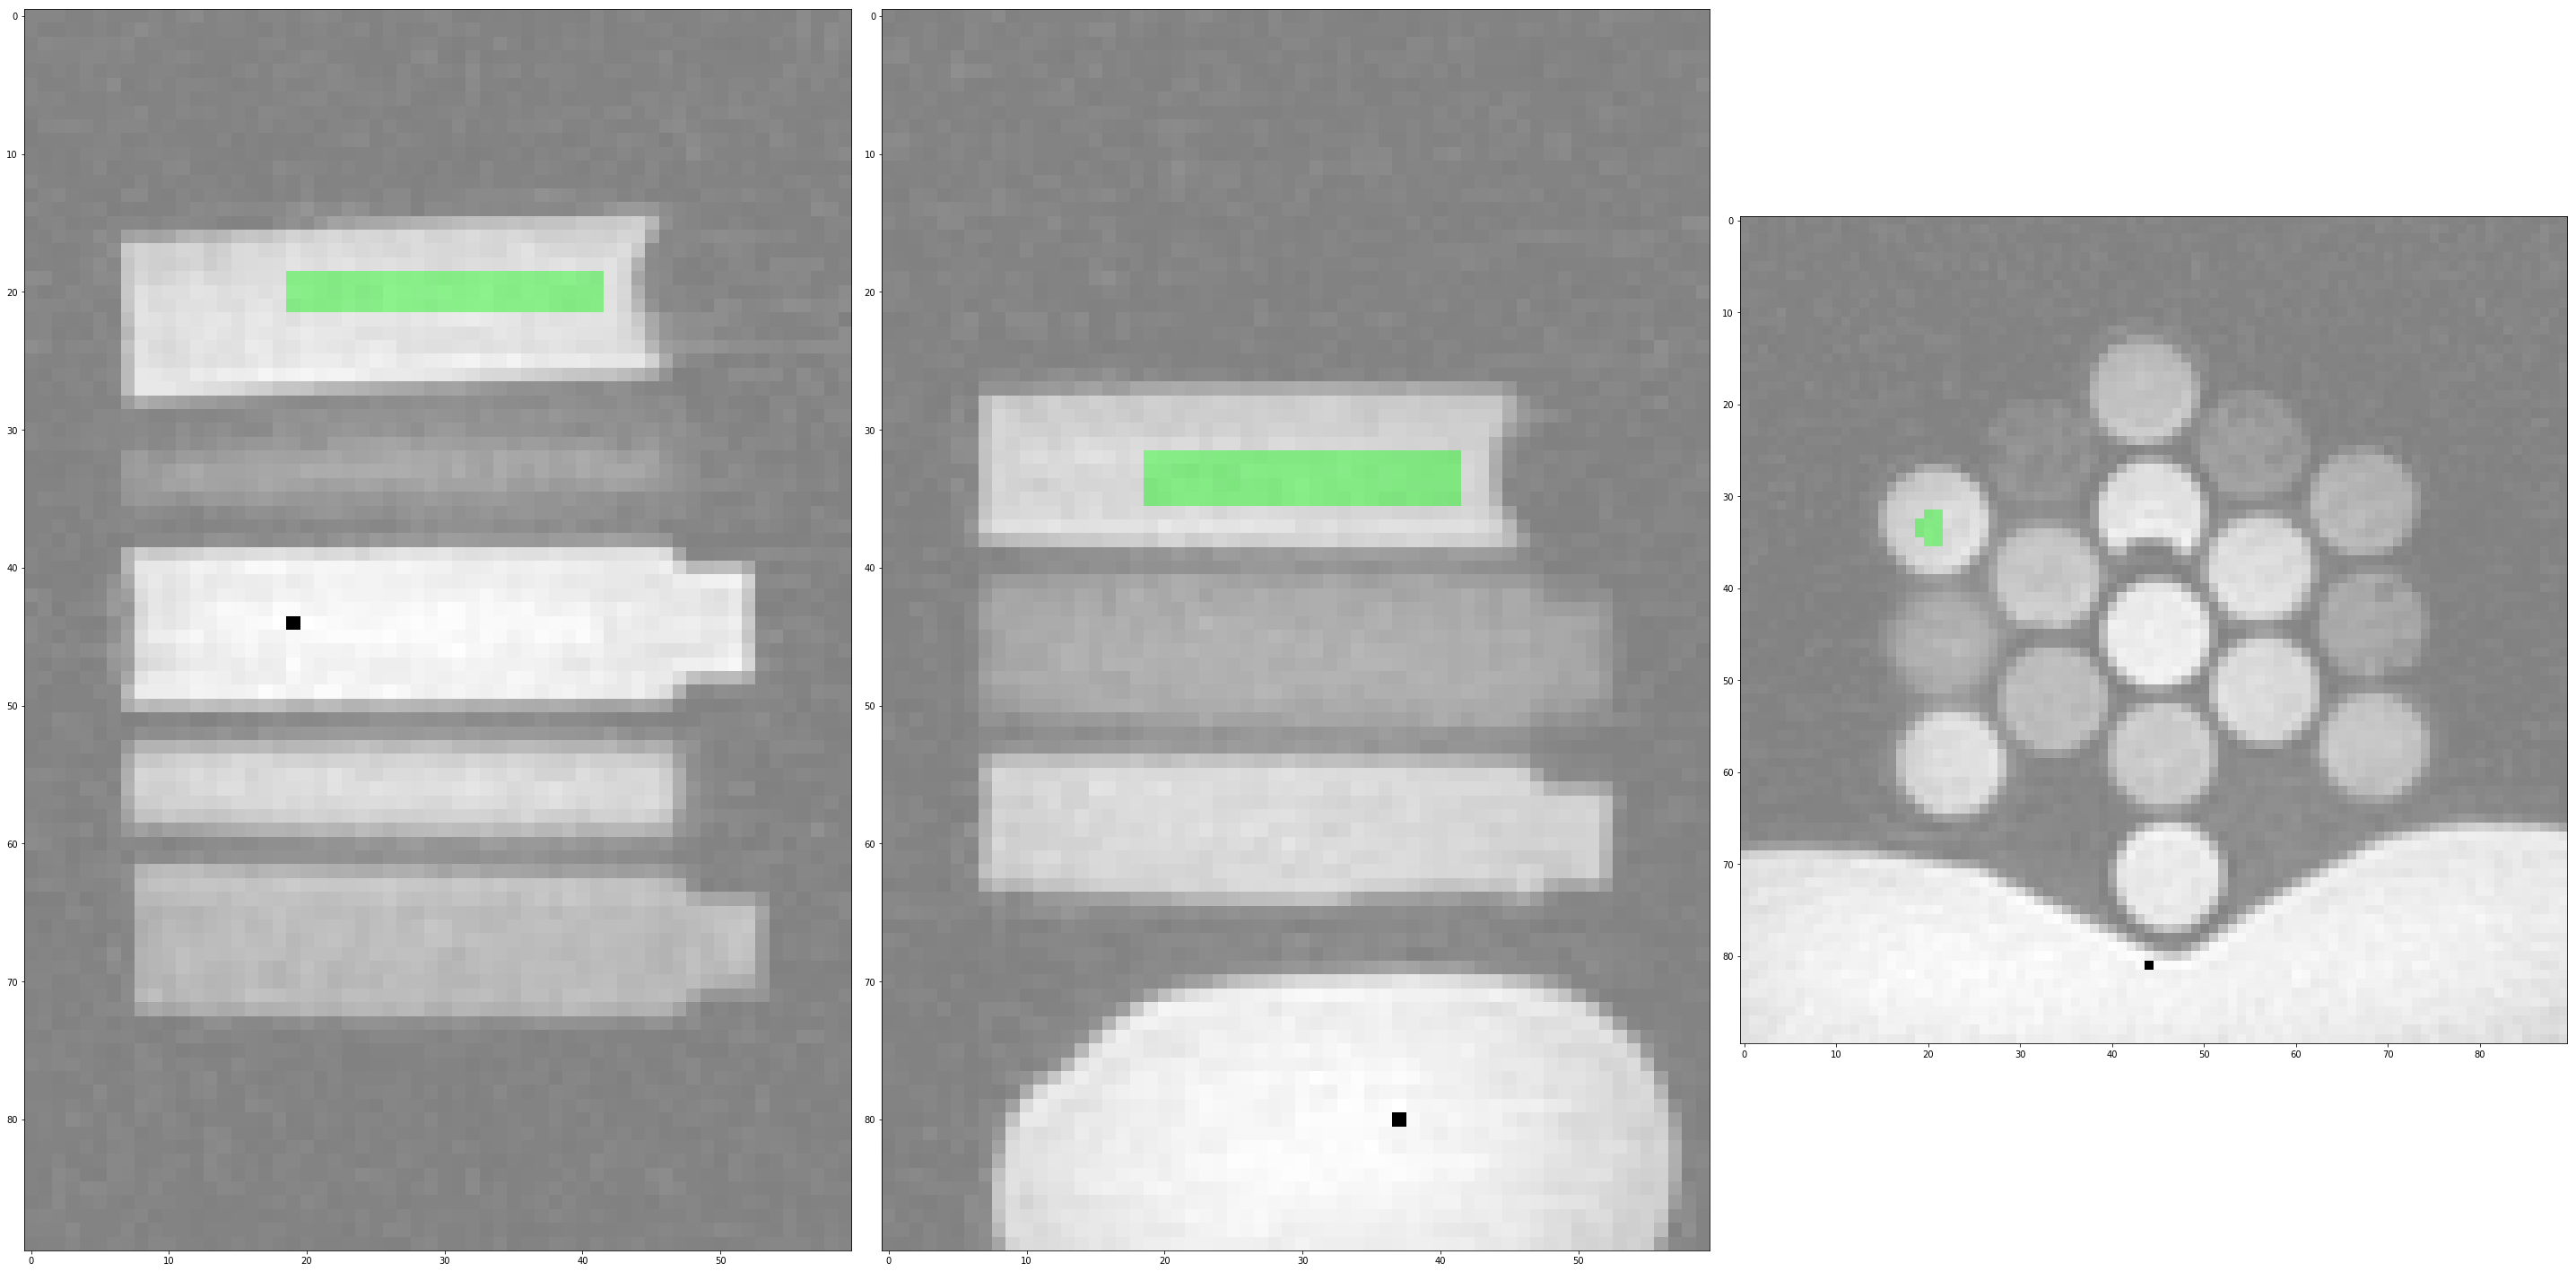

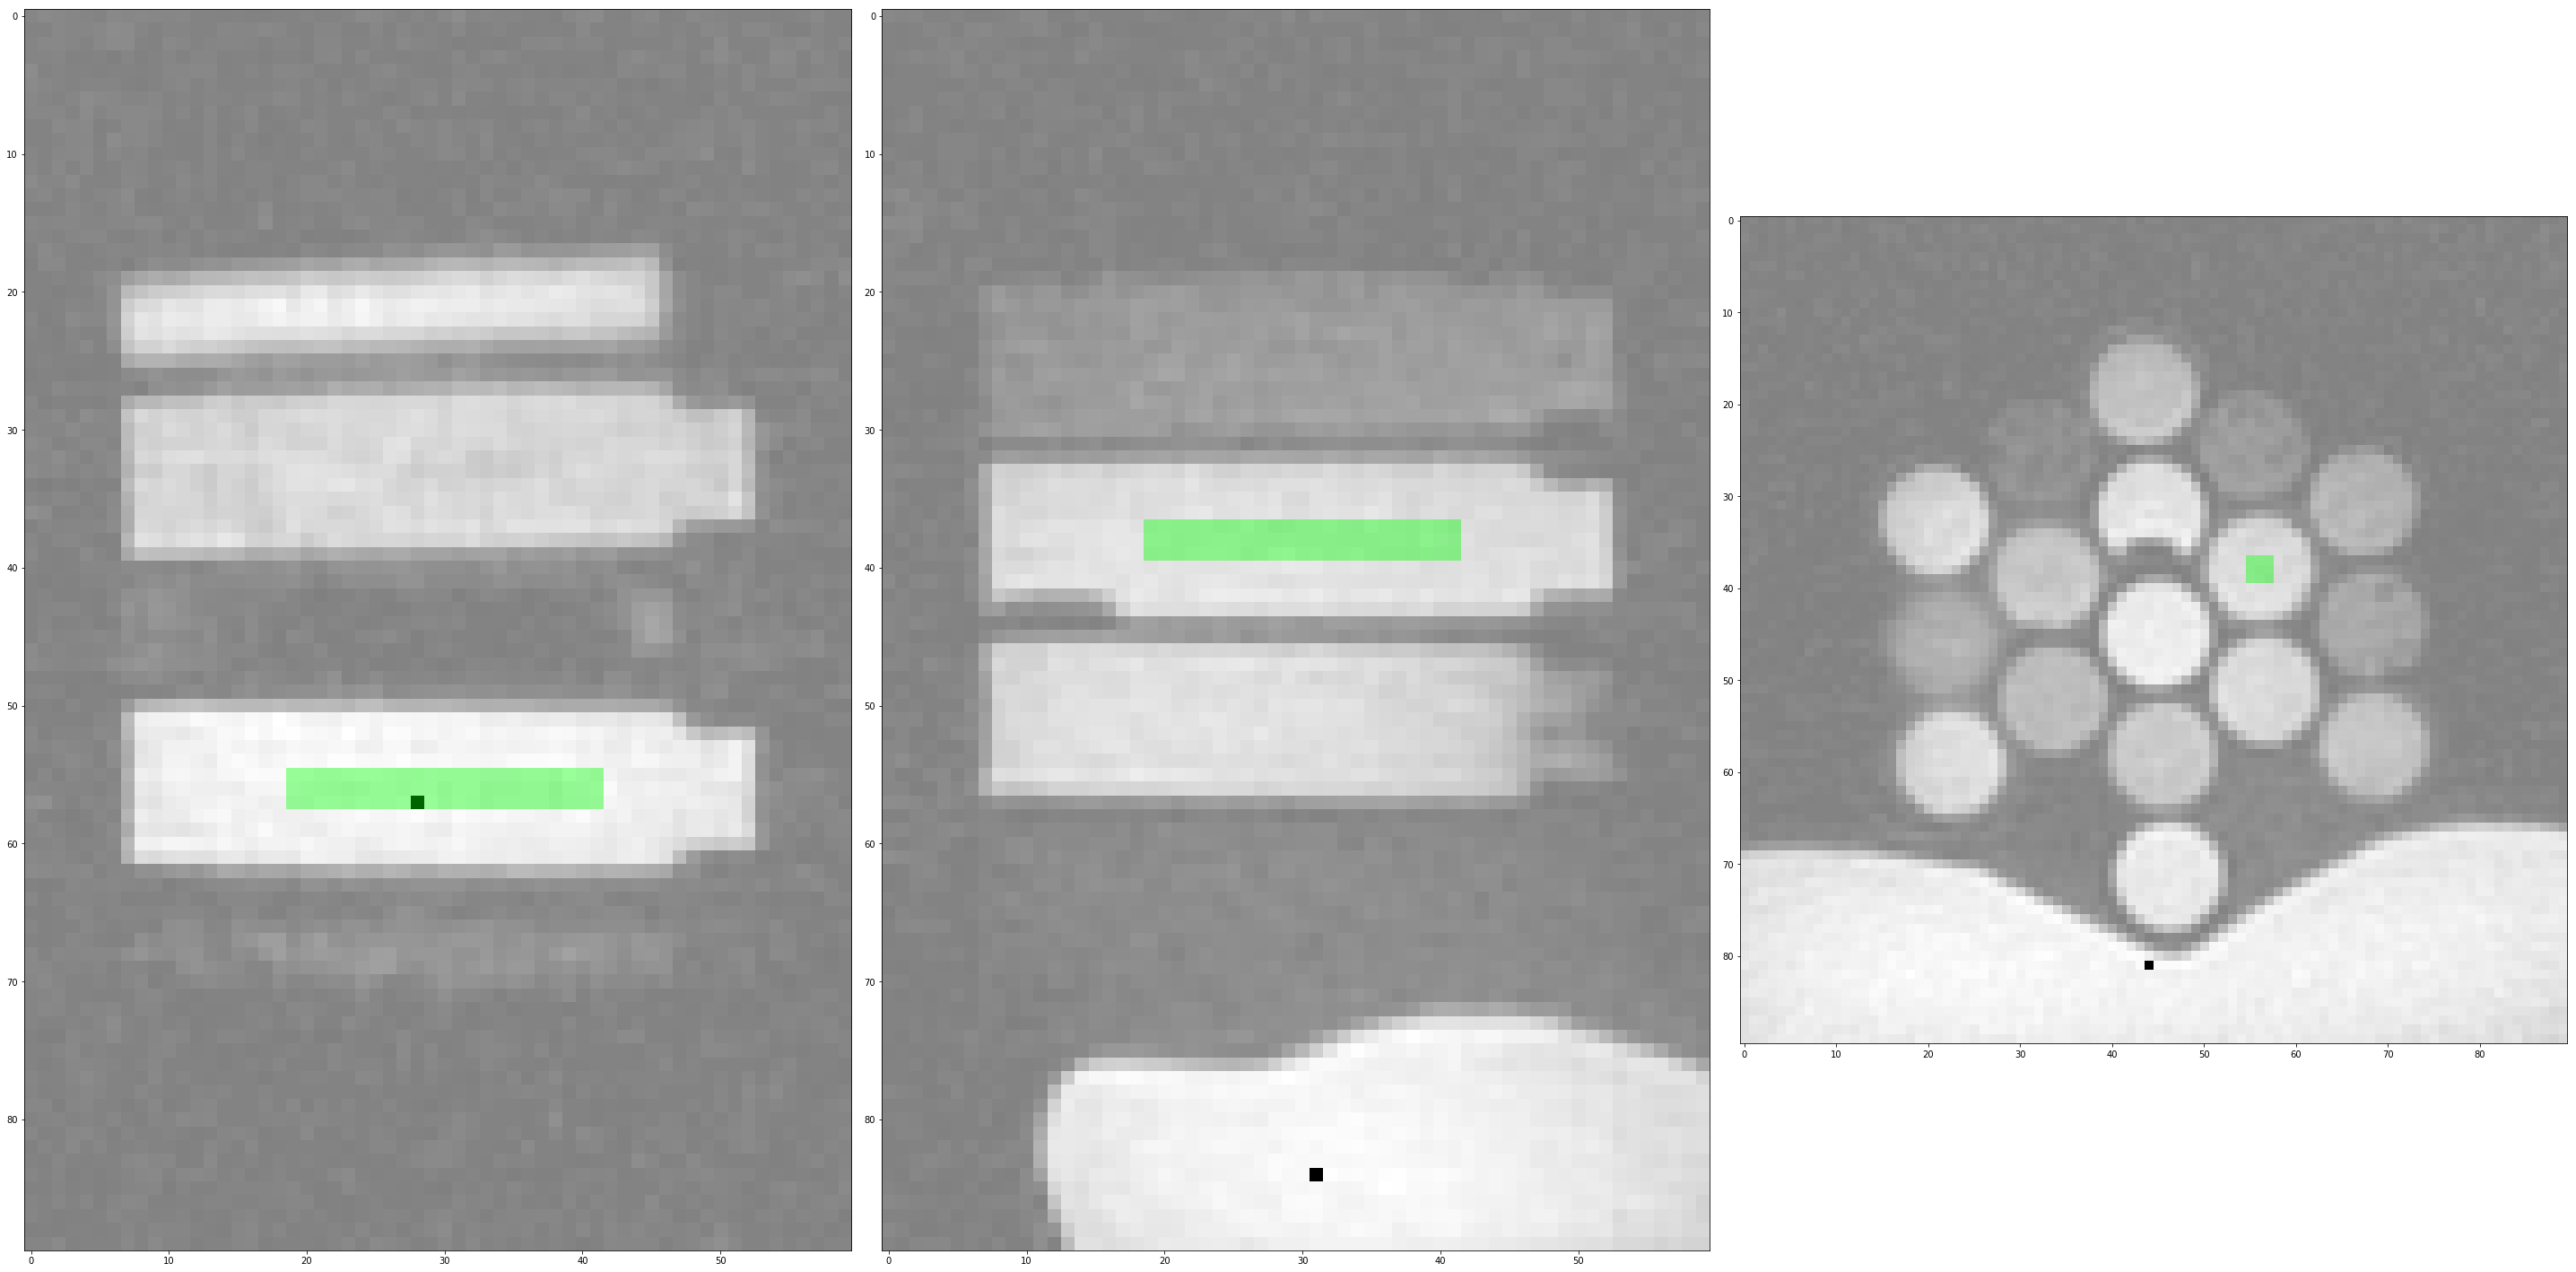

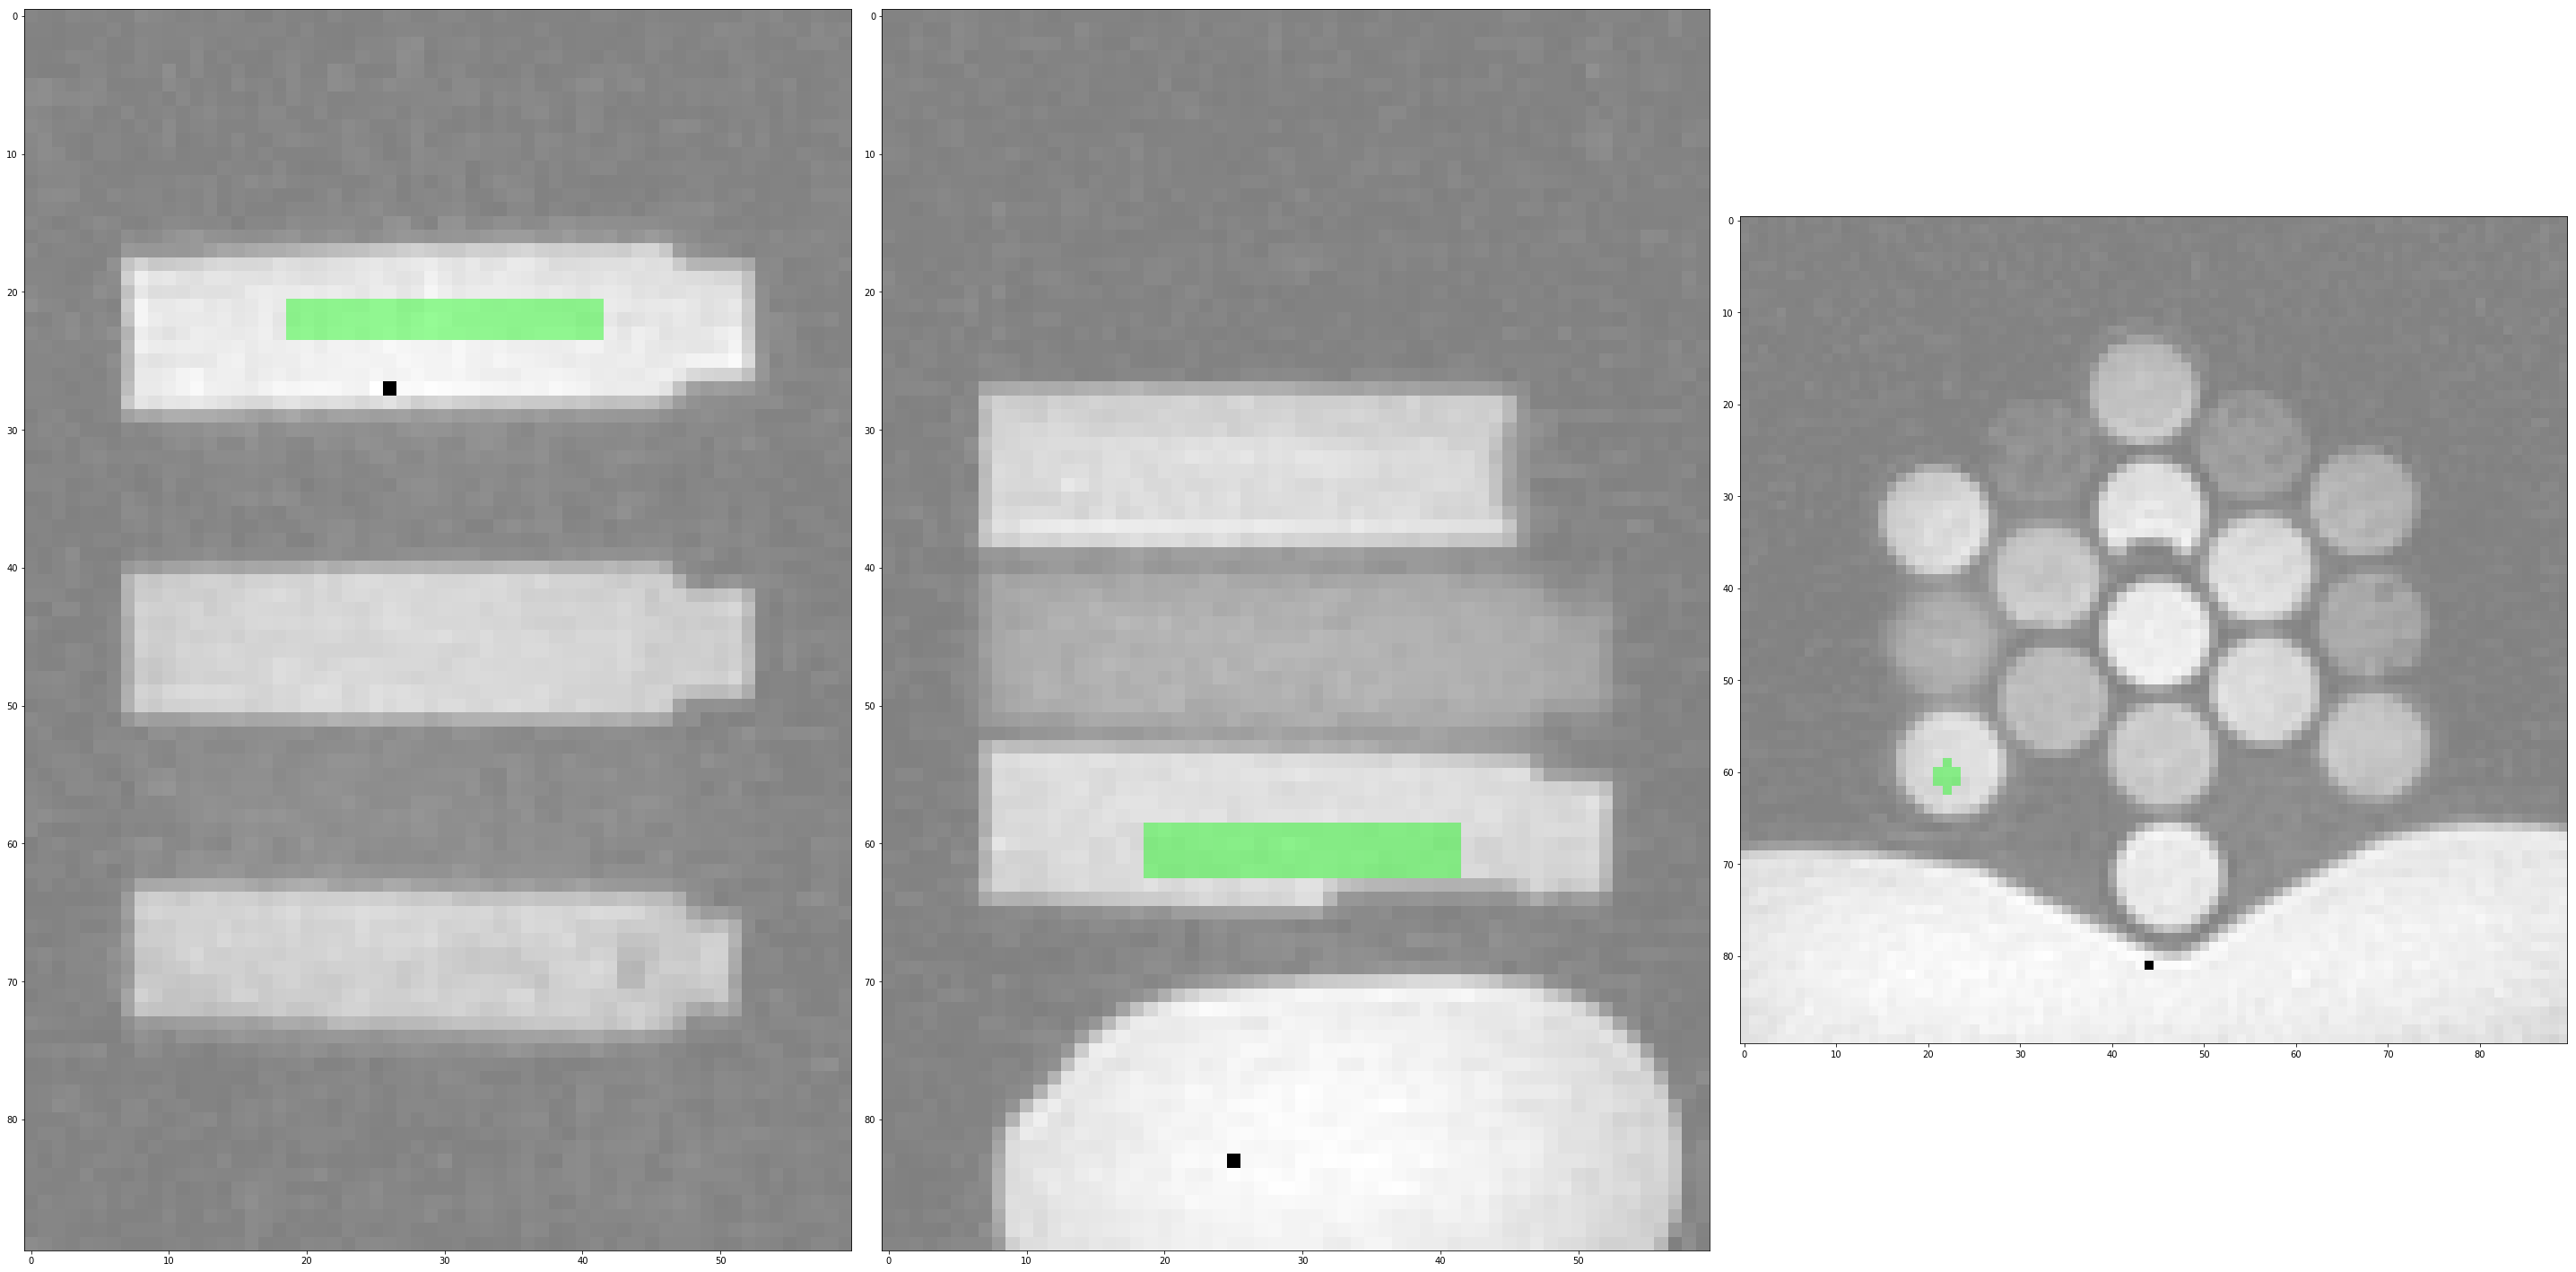

In [9]:
# Plot each ROI through the center

plt.close()
alpha = 0.4

for ci, roi in enumerate(roi_info):
    fig, ax = plt.subplots(1, 3, figsize=(40.0, 20.0))
    
    # Plot a slice in each axis through the ROI center
    cx, cy, cz = (
        int(roi['cx']/dx),
        int(roi['cy']/dy),
        int(roi['cz']/dz)
    )
    
    rows, cols, xslice = norm_mag_slice(recon_ims_all_echoes[0,0,::], cx, 0)
    rows, cols, yslice = norm_mag_slice(recon_ims_all_echoes[0,0,::], cy, 1)
    rows, cols, zslice = norm_mag_slice(recon_ims_all_echoes[0,0,::], cz, 2)
    
    roi_data = np.zeros((nx, ny, nz, 4), dtype=np.float)
    roi_data[:,:,:,1] = roi['mask']
    roi_data[:,:,:,3] = alpha * roi['mask']
    
    ax[0].imshow(xslice, cmap=plt.cm.gray)
    ax[0].imshow(roi_data[cx,:,:,:])
    
    ax[1].imshow(yslice, cmap=plt.cm.gray)
    ax[1].imshow(roi_data[:,cy,:,:])
    
    ax[2].imshow(zslice, cmap=plt.cm.gray)
    ax[2].imshow(roi_data[:,:,cz,:])
    
    fig.tight_layout()

plt.show()


In [10]:
# Collect data from each ROI
# Note: assumes ROIs are uniform & uses all voxels as separate datapoints for fit

for roi in roi_info:
    roi['echo_times'] = []
    roi['signal_magnitudes'] = []
    
    for zi in range(nz):
        for yi in range(ny):
            for xi in range(nx):
                if (roi['mask'][xi, yi, zi]):
                    roi['echo_times'].extend(ute_list)
                    roi['signal_magnitudes'].extend(
                        np.float(np.abs(np.complex(*recon_ims_all_echoes[ei,0,zi,yi,xi]))) for ei in range(num_utes)
                    )
    
    roi['echo_times'] = np.array(roi['echo_times'], dtype=np.float)
    roi['signal_magnitudes'] = np.array(roi['signal_magnitudes'], dtype=np.float)
    
    #print('ROI: {:s}\n\t{:d} datapoints...'.format(roi['label'], roi['echo_times'].size))

In [11]:
# Perform per-ROI fit

from scipy.optimize import least_squares

# Magnitude signal model
def mag_signal_model(params, utes):
    """Magnitude Signal Model
    
    S = K * [ exp(-TE/T2) ] + N (for spin-echo sequences)
    S = K * [ exp(-TE/T2*) ] + N (for gradient-echo sequences)
    
    parameters:
      params[0] = T2 (or T2*) :: spin-spin relaxation time
      params[1] = K :: constant signal (proportional to PD)
      params[2] = N :: noise offset
      
    utes = sequence echo times
    
    @return expected signal (magnitude)
    """
    T2 = params[0]
    K = params[1]
    N = params[2]
    
    S = K * np.exp((-1.0 * utes)/T2) + N
    return S

def mag_sig_residuals(params, utes, obs_sig):
    """Residuals based on magnitude signal model
    
    @param params: vector containing T2, K, and N (model parameters)
    @param utes: sequence echo times (independent variable)
    @param obs_sig: observed signal (fitting target)
    
    @return res: vector of residuals (for minimization)
      = expected - observed signal
    """
    res = mag_signal_model(params, utes) - obs_sig
    return res

for roi in roi_info:
    # Compute initial parameter estimates
    #T2_est = (roi['echo_times'][5] - roi['echo_times'][0]) / np.log(roi['signal_magnitudes'][5]/roi['signal_magnitudes'][0])
    T2_est = 100.0
    K_est = np.max(roi['signal_magnitudes']) * 1.2
    N_est = np.mean(roi['signal_magnitudes'][np.where(roi['echo_times'] == np.max(roi['echo_times']))])
    
    print('\n*** Computing fit for ROI: {:s} ***'.format(roi['label']))
    #print('\tT2* init. estimate = {:f}'.format(T2_est))
    #print('\tK init. estimate   = {:f}'.format(K_est))
    #print('\tN init. estimate   = {:f}\n'.format(N_est))
    
    params_est = np.array((T2_est, K_est, N_est))
    result = least_squares(mag_sig_residuals,
                           params_est,
                           args=(roi['echo_times'],
                                 roi['signal_magnitudes']),
                           method='lm', verbose=2)
    
    print('\tT2* = {:f}'.format(result.x[0]))
    print('\tK   = {:f}'.format(result.x[1]))
    print('\tN   = {:f}\n'.format(result.x[2]))
    
    roi['fit_result'] = result
    


*** Computing fit for ROI: 0: (W01.1) Water ***
`ftol` termination condition is satisfied.
Function evaluations 74, initial cost 3.9554e-03, final cost 6.2992e-05, first-order optimality 1.18e-08.
	T2* = 772.341318
	K   = 0.000168
	N   = 0.003269


*** Computing fit for ROI: 1: (W01.2) Water ***
`ftol` termination condition is satisfied.
Function evaluations 57, initial cost 3.3980e-03, final cost 2.6867e-05, first-order optimality 1.39e-09.
	T2* = 11155.704052
	K   = 0.000850
	N   = 0.002653


*** Computing fit for ROI: 2: (A06.1) Coconut Oil ***
`ftol` termination condition is satisfied.
Function evaluations 49, initial cost 1.5004e-03, final cost 2.4401e-04, first-order optimality 4.26e-09.
	T2* = 1858.516775
	K   = 0.001437
	N   = 0.000848


*** Computing fit for ROI: 3: (A06.2) Coconut Oil ***
`ftol` termination condition is satisfied.
Function evaluations 49, initial cost 1.0408e-03, final cost 1.2654e-04, first-order optimality 1.57e-09.
	T2* = 1914.749779
	K   = 0.001388
	N   

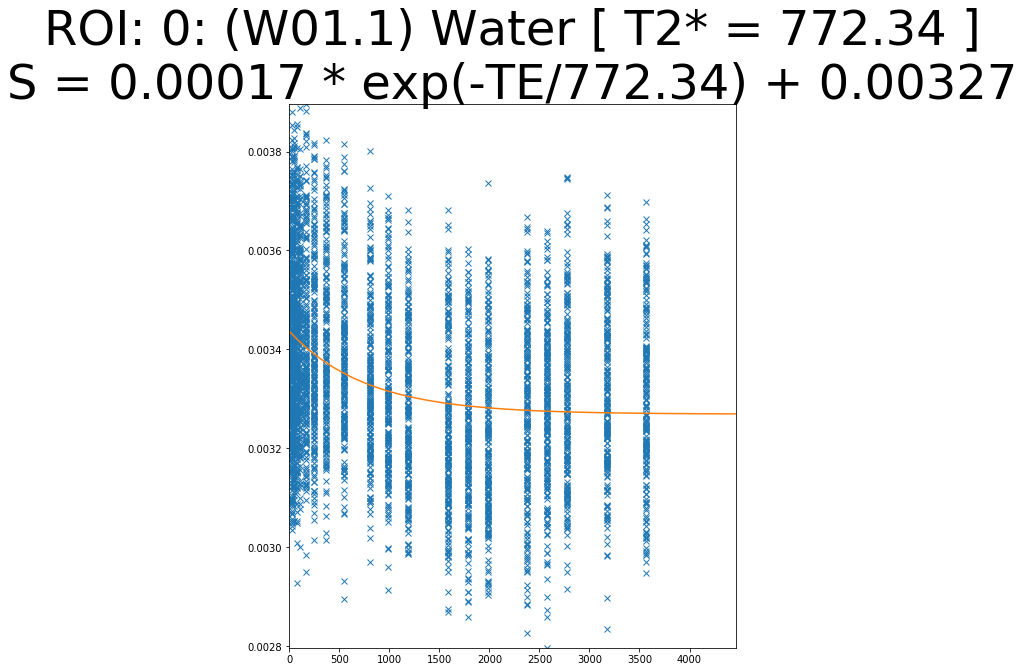

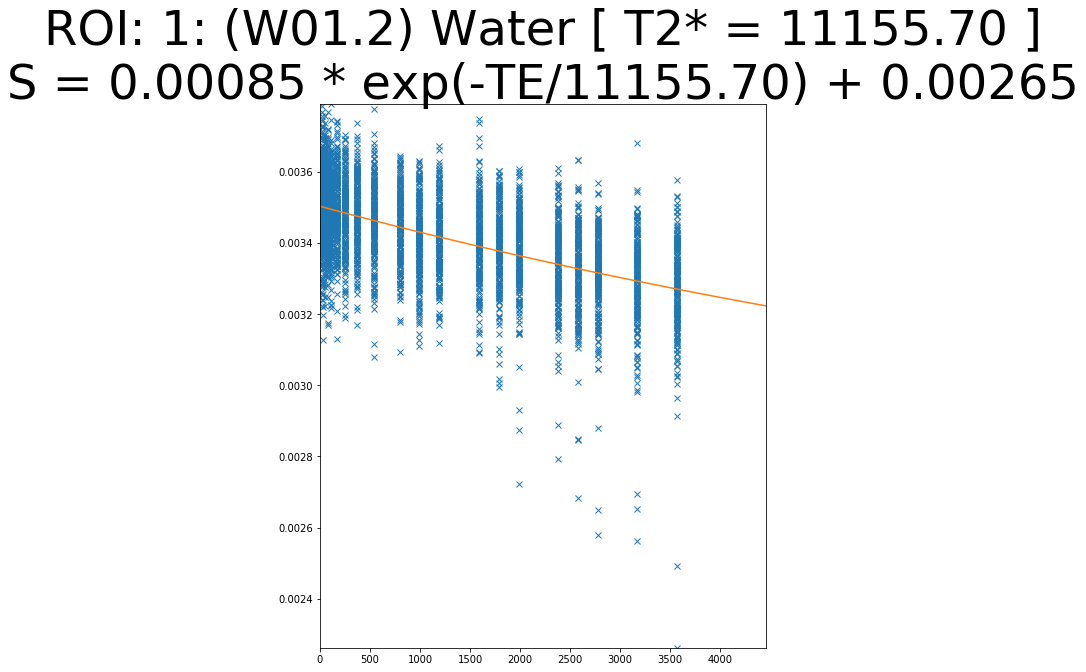

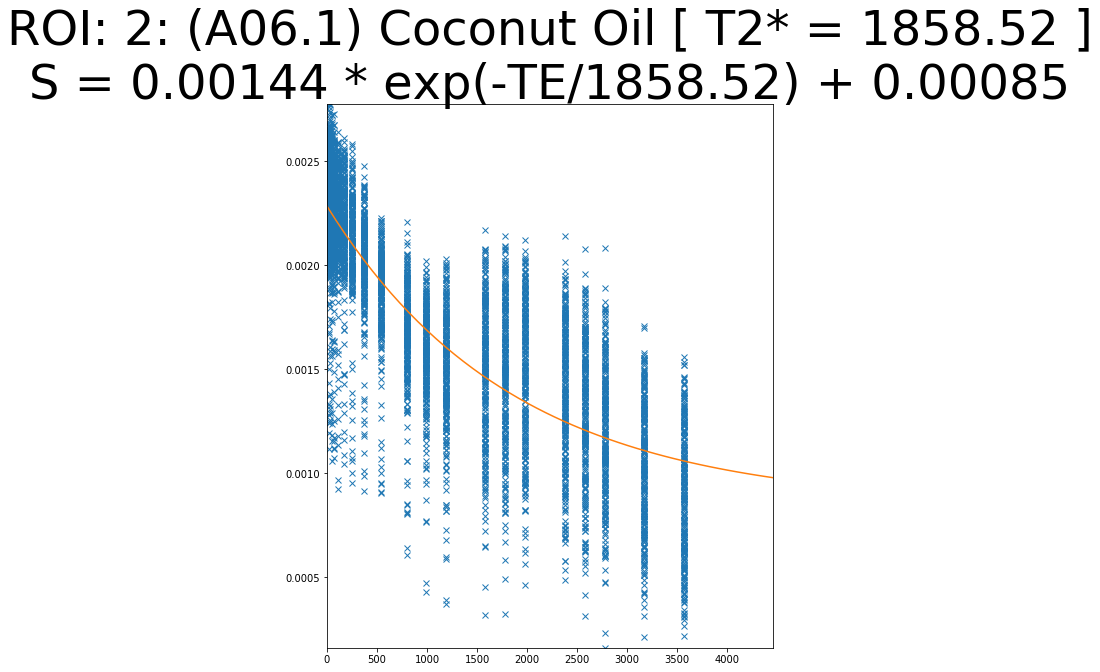

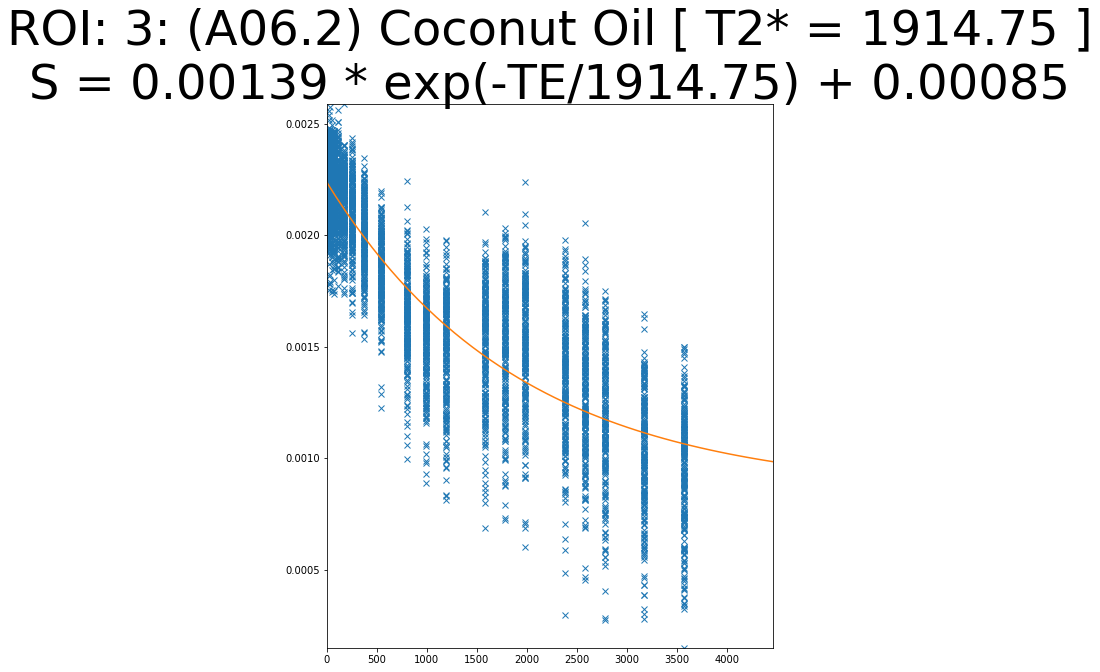

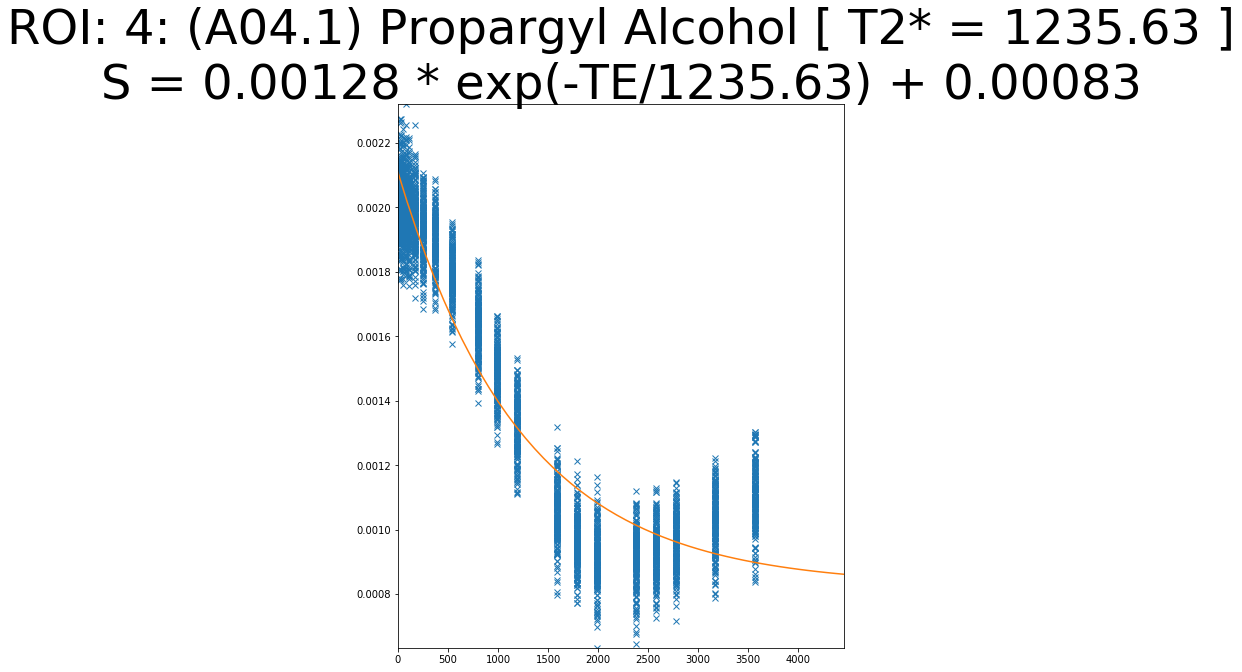

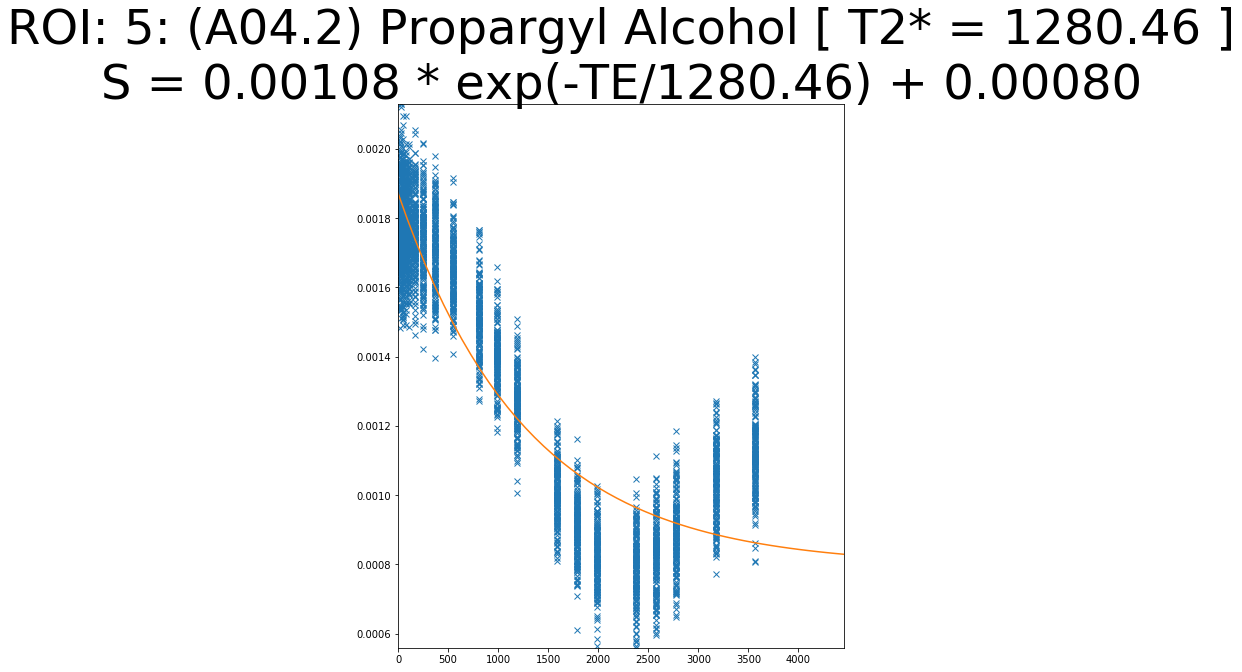

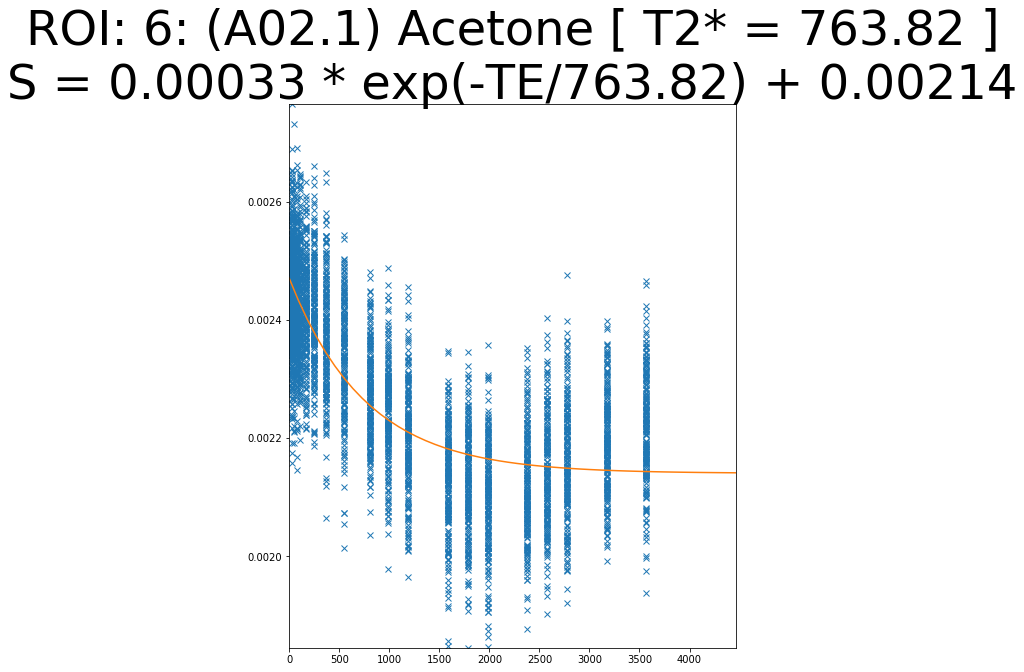

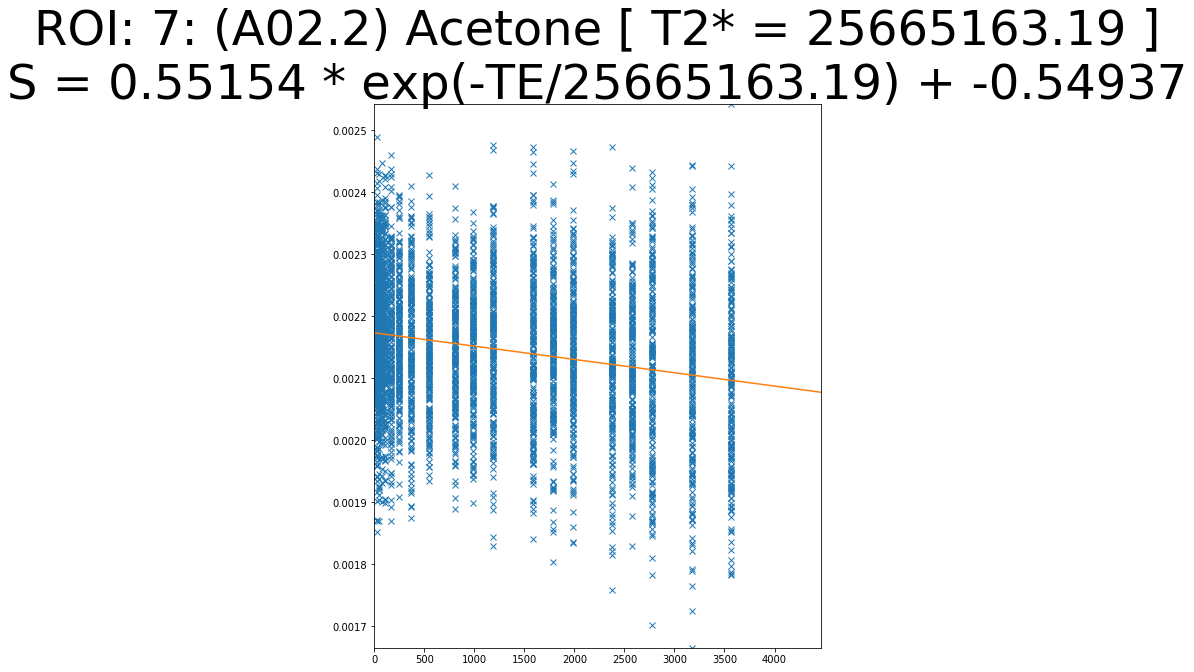

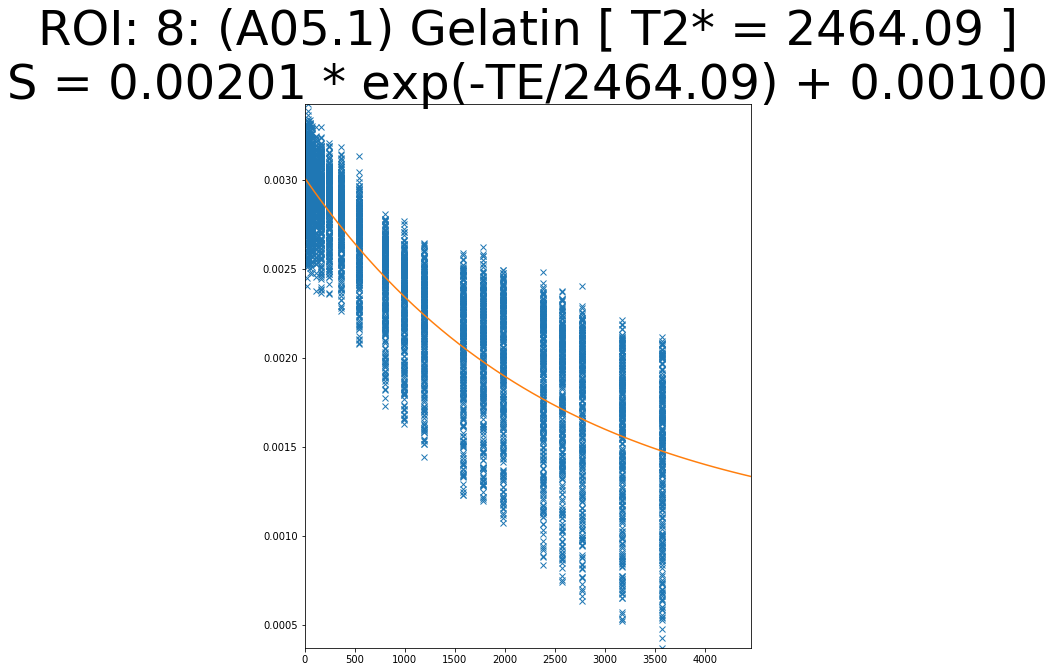

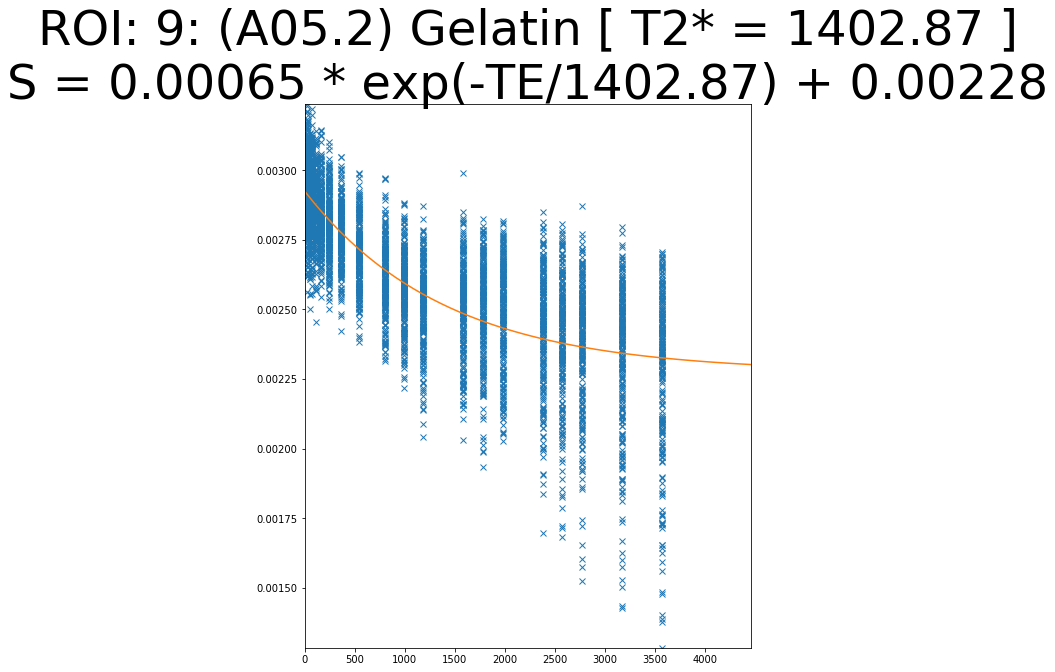

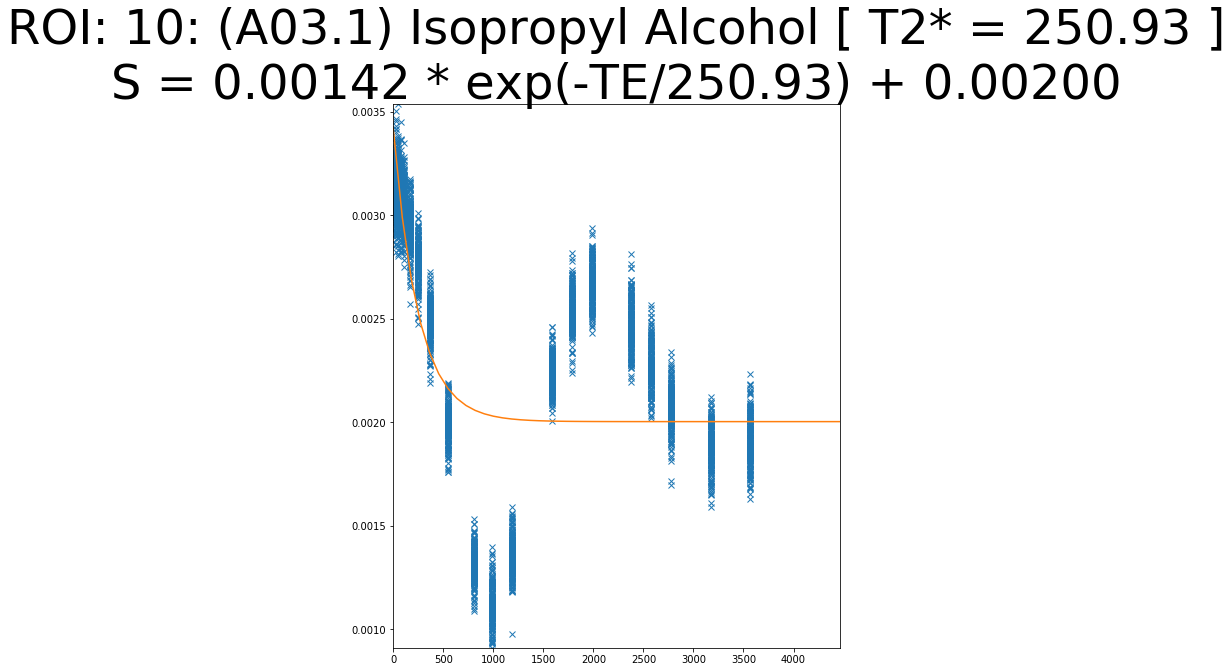

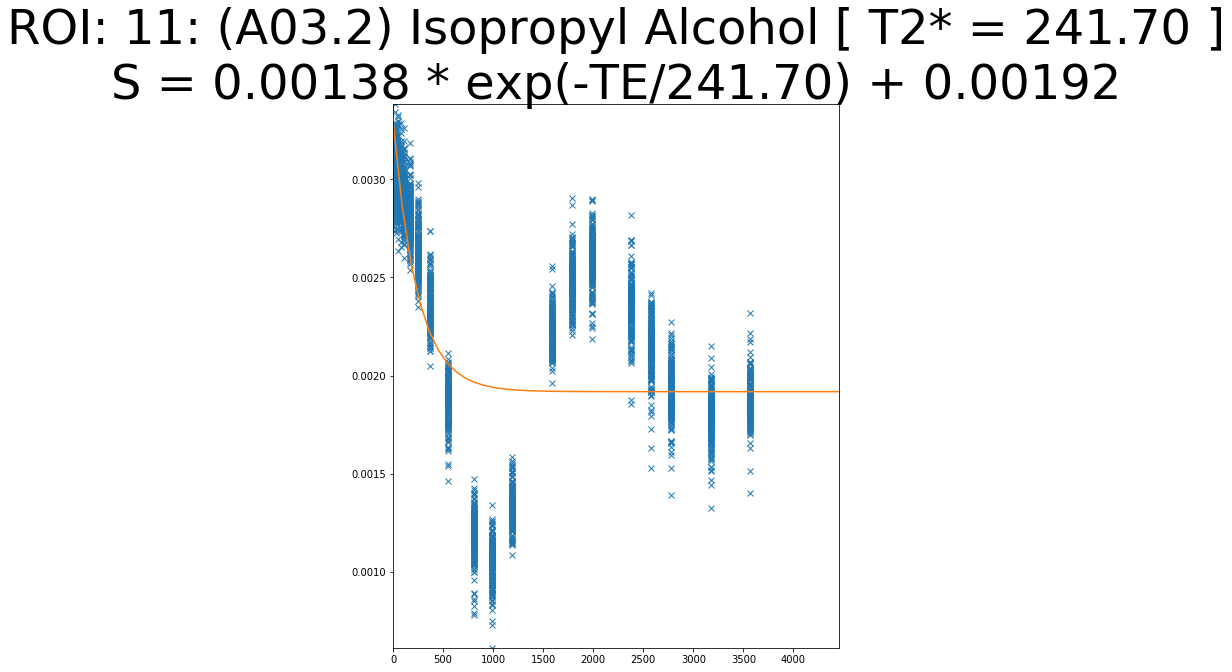

In [12]:
# Plot fit data

plt.close()

for ci, roi in enumerate(roi_info):
    fig = plt.figure(figsize=(8.0,10.0))
    ai = fig.add_subplot('111')
    
    te = np.linspace(0.0, ute_list[-1] * 1.25, 50)
    fit = mag_signal_model(roi['fit_result'].x, te)
    ai.plot(roi['echo_times'], roi['signal_magnitudes'], 'x')
    ai.plot(te, fit, '-')
    
    ai.set_title('{:s}\nS = {:6.5f} * exp(-TE/{:6.2f}) + {:6.5f}'.format(
        'ROI: {:s} [ T2* = {:6.2f} ]'.format(roi['label'], roi['fit_result'].x[0]),
        roi['fit_result'].x[1],
        roi['fit_result'].x[0],
        roi['fit_result'].x[2]
    ), fontdict={'fontsize': 48})
    ai.autoscale(enable=True, axis='both', tight=True)
    
    #fig.tight_layout()
    fig.patch.set_facecolor('#ffffff')

plt.show()

In [13]:
# Collect "PDw" signal intensity data from each ROI (first echo)

for roi in roi_info:
    roi['pd_signal'] = []
    
    for zi in range(nz):
        for yi in range(ny):
            for xi in range(nx):
                if (roi['mask'][xi, yi, zi]):
                    roi['pd_signal'].append(
                        np.float(np.abs(np.complex(*recon_ims_all_echoes[0,0,zi,yi,xi])))
                    )
    
    roi['pd_signal'] = np.array(roi['signal_magnitudes'], dtype=np.float)
    roi['mean_pd_signal'] = np.mean(roi['pd_signal'])
    
    print('ROI: {:s} -> {:f}'.format(roi['label'], roi['mean_pd_signal']))

ROI: 0: (W01.1) Water -> 0.003341
ROI: 1: (W01.2) Water -> 0.003419
ROI: 2: (A06.1) Coconut Oil -> 0.001725
ROI: 3: (A06.2) Coconut Oil -> 0.001704
ROI: 4: (A04.1) Propargyl Alcohol -> 0.001494
ROI: 5: (A04.2) Propargyl Alcohol -> 0.001365
ROI: 6: (A02.1) Acetone -> 0.002281
ROI: 7: (A02.2) Acetone -> 0.002147
ROI: 8: (A05.1) Gelatin -> 0.002351
ROI: 9: (A05.2) Gelatin -> 0.002632
ROI: 10: (A03.1) Isopropyl Alcohol -> 0.002378
ROI: 11: (A03.2) Isopropyl Alcohol -> 0.002275


['0: (W01.1) Water', '4: (A04.1) Propargyl Alcohol', '6: (A02.1) Acetone', '10: (A03.1) Isopropyl Alcohol']
2: (A06.1) Coconut Oil h_total (pred.) =       7.69%
8: (A05.1) Gelatin h_total (pred.) =           9.14%


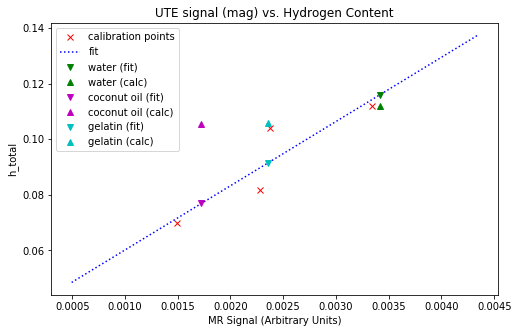

In [14]:
# Generate calibration curve (inner containers)

pdw_refs = np.array([roi_info[ci]['mean_pd_signal'] for ci in (0,4,6,10)])
print([roi_info[ci]['label'] for ci in (0,4,6,10)])
H_refs = np.array([
    0.111898344, # Water (W01.1) -> 0
    0.069864914, # Propargyl Alcohol (A04.1) -> 4
    0.081688083, # Acetone (A02.1) -> 6
    0.104127575, # Isopropyl Alcohol (A03.1) -> 10
])

fit = np.polyfit(pdw_refs, H_refs, 1)
fit_fn = np.poly1d(fit)

plt.close()
fig = plt.figure(figsize=(8.0,5.0))

plt.plot(pdw_refs, H_refs, 'rx', label='calibration points')
pdw_sig = np.linspace(min(pdw_refs)-0.001, max(pdw_refs)+0.001, 10)
plt.plot(pdw_sig, fit_fn(pdw_sig), 'b:', label='fit')
plt.title('UTE signal (mag) vs. Hydrogen Content')
plt.xlabel('MR Signal (Arbitrary Units)')
plt.ylabel('h_total')

w=plt.plot(roi_info[1]['mean_pd_signal'], fit_fn(roi_info[1]['mean_pd_signal']), 'gv', label='water (fit)')
wa=plt.plot(roi_info[1]['mean_pd_signal'], .112, 'g^', label='water (calc)')
c=plt.plot(roi_info[2]['mean_pd_signal'], fit_fn(roi_info[2]['mean_pd_signal']), 'mv', label='coconut oil (fit)')
ca=plt.plot(roi_info[2]['mean_pd_signal'], 0.1053, 'm^', label='coconut oil (calc)')
g=plt.plot(roi_info[8]['mean_pd_signal'], fit_fn(roi_info[8]['mean_pd_signal']), 'cv', label='gelatin (fit)')
ga=plt.plot(roi_info[8]['mean_pd_signal'], 0.1057, 'c^', label='gelatin (calc)')

print('{:s} h_total (pred.) = {:10.2f}%'.format(roi_info[2]['label'],fit_fn(roi_info[2]['mean_pd_signal'])*100.0))
print('{:s} h_total (pred.) = {:14.2f}%'.format(roi_info[8]['label'],fit_fn(roi_info[8]['mean_pd_signal'])*100.0))

plt.legend()

fig.patch.set_facecolor('white')
fig.savefig('PD_quant.png')
plt.show()

['1: (W01.2) Water', '5: (A04.2) Propargyl Alcohol', '7: (A02.2) Acetone', '11: (A03.2) Isopropyl Alcohol']
3: (A06.2) Coconut Oil h_total (pred.) =       7.96%
9: (A05.2) Gelatin h_total (pred.) =           9.87%


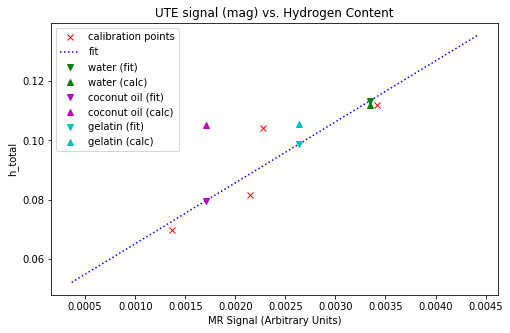

In [15]:
# Generate calibration curve (outer containers)

ref_containers = (1,5,7,11)
pdw_refs = np.array([roi_info[ci]['mean_pd_signal'] for ci in ref_containers])
print([roi_info[ci]['label'] for ci in ref_containers])
H_refs = np.array([
    0.111898344, # Water (W01.2) -> 1
    0.069864914, # Propargyl Alcohol (A04.2) -> 5
    0.081688083, # Acetone (A02.2) -> 7
    0.104127575, # Isopropyl Alcohol (A03.2) -> 11
])

fit = np.polyfit(pdw_refs, H_refs, 1)
fit_fn = np.poly1d(fit)

plt.close()
fig = plt.figure(figsize=(8.0,5.0))

plt.plot(pdw_refs, H_refs, 'rx', label='calibration points')
pdw_sig = np.linspace(min(pdw_refs)-0.001, max(pdw_refs)+0.001, 10)
plt.plot(pdw_sig, fit_fn(pdw_sig), 'b:', label='fit')
plt.title('UTE signal (mag) vs. Hydrogen Content')
plt.xlabel('MR Signal (Arbitrary Units)')
plt.ylabel('h_total')

w=plt.plot(roi_info[0]['mean_pd_signal'], fit_fn(roi_info[0]['mean_pd_signal']), 'gv', label='water (fit)')
wa=plt.plot(roi_info[0]['mean_pd_signal'], .112, 'g^', label='water (calc)')
c=plt.plot(roi_info[3]['mean_pd_signal'], fit_fn(roi_info[3]['mean_pd_signal']), 'mv', label='coconut oil (fit)')
ca=plt.plot(roi_info[3]['mean_pd_signal'], 0.1053, 'm^', label='coconut oil (calc)')
g=plt.plot(roi_info[9]['mean_pd_signal'], fit_fn(roi_info[9]['mean_pd_signal']), 'cv', label='gelatin (fit)')
ga=plt.plot(roi_info[9]['mean_pd_signal'], 0.1057, 'c^', label='gelatin (calc)')

print('{:s} h_total (pred.) = {:10.2f}%'.format(roi_info[3]['label'],fit_fn(roi_info[3]['mean_pd_signal'])*100.0))
print('{:s} h_total (pred.) = {:14.2f}%'.format(roi_info[9]['label'],fit_fn(roi_info[9]['mean_pd_signal'])*100.0))

plt.legend()

fig.patch.set_facecolor('white')
fig.savefig('PD_quant.png')
plt.show()